# Predicting Social Network Psychological Distress

## Problem Statement:

Predicting psychological distress


## Need of the study:

Mental distress is slowly and steadily creeping in the online community. It is pertinent to explore the important  factors leading to mental distress risk.

Objective: 

Statistical analysis and Prediction of mental distress from our dataset and twitter dataset. Explore the datasets and extract insights from the data. 

### Importing required packages



We will import required packages for the analysis.

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing all required libraries 

import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn import tree
#import scikitplot as skplt
from keras import callbacks
from sklearn import metrics


from sklearn.svm import SVC
from functools import reduce
from keras.optimizers import *
from keras.layers import Dense
from collections import Counter
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict, learning_curve, GridSearchCV
from sklearn import model_selection

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mental.xlsx to mental.xlsx


In [ ]:

import io
df = pd.read_excel(io.BytesIO(uploaded['mental.xlsx']))


## Data importing
Here we will import abtest xls data.

In [ ]:
#df = pd.read_excel("C:/Users/ggmre/OneDrive/Desktop/Kathleen_python/E-News Express project2 - python/abtest.xls", sep=',')

# Part1 - Data understanding

We will check structure and summary of data befor data analysis.

In [ ]:
#Head of data
pd.set_option('display.max_columns', None)
df.head()

,Gender,Age,Work experience,Num_SMA,Freq_useSMA,time_spend_SM_perday,freq_post_SM,useof_SM,Salience,Tolerance,Mood_modifications,Relapse,Withdrawal,Conflict,Addicted_SM,suf_Mental_health,Medications,Stress_Score,Anxiety_Score,Depression_Score,computed_feature
0,Female,13-20 years,6-10 years,1,10+ times,30-60 minutes,Daily,"To meet new friends, To browse, News/informati...",Rarely,Sometimes,Often,Rarely,Sometimes,Rarely,Yes,No,No,7,8,7,0
1,Male,29-36 years,Below 5 years,1,2-5 times a day,1-2 hours,Every few months,"To meet new friends, News/informative content",Often,Often,Sometimes,Very rarely,Often,Very Often,Yes,Yes,No,13,16,13,8
2,Female,13-20 years,Still a student,More than 6,10+ times,2-3 hours,Monthly,To meet new friends,Sometimes,Rarely,Sometimes,Rarely,Very rarely,Rarely,No,No,No,12,11,12,0
3,Female,21-28 years,Below 5 years,2-3,2-5 times a day,1-2 hours,Every few months,To meet new friends,Sometimes,Often,Often,Often,Often,Often,No,No,No,14,14,14,0
4,Female,21-28 years,Below 5 years,2-3,Once a day,30-60 minutes,Every few months,To meet new friends,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,No,No,No,14,14,14,0


In [ ]:
# Understanding of data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                2500 non-null   object
 1   Age                   2500 non-null   object
 2   Work experience       2500 non-null   object
 3   Num_SMA               2500 non-null   object
 4   Freq_useSMA           2500 non-null   object
 5   time_spend_SM_perday  2500 non-null   object
 6   freq_post_SM          2500 non-null   object
 7   useof_SM              2500 non-null   object
 8   Salience              2500 non-null   object
 9   Tolerance             2500 non-null   object
 10  Mood_modifications    2500 non-null   object
 11  Relapse               2500 non-null   object
 12  Withdrawal            2500 non-null   object
 13  Conflict              2500 non-null   object
 14  Addicted_SM           2500 non-null   object
 15  suf_Mental_health     2500 non-null   

## Observations:

* There are 2500 observations and 21 variables in the data. 
* 4 variables are numeric and 17 variables are object data types.
* There are no missing values in the data as all variables have 2500 observations.
* Columns tied with data type “int64” denotes numerical data while data type “object” denotes categorical data.


In [ ]:
# Column names
df.columns

Index(['Gender', 'Age', 'Work experience ', 'Num_SMA', 'Freq_useSMA',
       'time_spend_SM_perday', 'freq_post_SM', 'useof_SM', 'Salience',
       'Tolerance', 'Mood_modifications', 'Relapse', 'Withdrawal', 'Conflict',
       'Addicted_SM', 'suf_Mental_health', 'Medications', 'Stress_Score',
       'Anxiety_Score', 'Depression_Score', 'computed_feature'],
      dtype='object')

Above results showing variable names in the data. There are total 21 variable in the data.

In [ ]:
# descriptive details of numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Stress_Score,2500.0,9.5108,3.909782,0.0,7.0,10.0,12.0,21.0
Anxiety_Score,2500.0,9.4824,3.933940,0.0,7.0,10.0,12.0,21.0
Depression_Score,2500.0,9.5140,3.970303,0.0,7.0,10.0,12.0,21.0
computed_feature,2500.0,1.1328,1.835787,0.0,0.0,0.0,1.0,12.0


## Observations

- The average Stress_Score is 9.5108 and standard deviation is 3.909782.
- The average Anxiety_Score is 9.4824 and standard deviation is 3.933940.	
- The average Depression_Score is 9.5140 and standard deviation is 3.970303.
- Average and standard deviation of Depression score is higher than Stress score and Anxiety score.
-  Average of computed feature is 1.1328. standard deviation of computed feature is higher than mean indicating possible outlies.
- Also computed feature have 0 value almost upto 50% value but maxinum value is 12. This indicated more than 50% observations have 0 computed value


In [ ]:
# descriptive details of categorical data
df1 = df.select_dtypes('object')
df1.describe().T

,count,unique,top,freq
Gender,2500,3,Female,1263
Age,2500,4,21-28 years,757
Work experience,2500,6,Below 5 years,521
Num_SMA,2500,5,2-3,925
Freq_useSMA,2500,5,2-5 times a day,587
time_spend_SM_perday,2500,5,1-2 hours,540
freq_post_SM,2500,5,Never,550
useof_SM,2500,117,News/informative content,279
Salience,2500,5,Very rarely,565
Tolerance,2500,5,Very rarely,551


## Observations

Above results shows descriptive analysis of categorical data. 

* Gender have 3 categories, we have to further explore gender.

* Use of social media have 117 category.


In [ ]:
# Missing value
df.isnull().sum()

Gender                  0
Age                     0
Work experience         0
Num_SMA                 0
Freq_useSMA             0
time_spend_SM_perday    0
freq_post_SM            0
useof_SM                0
Salience                0
Tolerance               0
Mood_modifications      0
Relapse                 0
Withdrawal              0
Conflict                0
Addicted_SM             0
suf_Mental_health       0
Medications             0
Stress_Score            0
Anxiety_Score           0
Depression_Score        0
computed_feature        0
dtype: int64

There are no missing value in the data. We have all user informations.

# Data Report

### Understanding how data was collected
* The data were collected at online survey
* Data were contains information about 2500 randomly selected individuals to understand **their psychiatric status**??.

### Visual inspection of data 
* Initially data had 41 columns
* We droped some variables and calculated score from all scale variables.
* Final Data have 21 columns (variables).
* There are 2500 rows (observations).
* Data have no missing value

### Data description
please put here data description if needed.

# Part 2. Exploratory data analysis (EDA)

## Univariate analysis 

Univariate analysis refers to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis. 

### Q.   How many Male and Female in the data ?


In [ ]:
#plt.style.use('fivethirtyeight') 

In [ ]:
# Count of user Gender
df.Gender.value_counts().to_frame()

,Gender
Female,1263
Male,1226
Prefer not to say,11


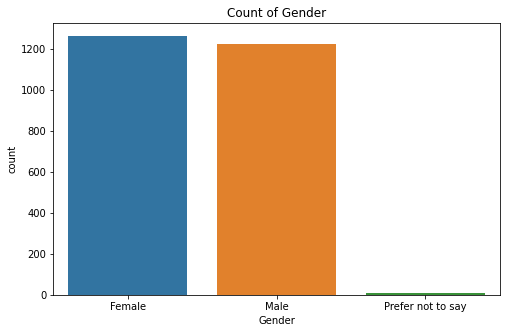

In [ ]:
# Bar Graph of user Gender
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Gender", data = df)
plt.title("Count of Gender")
plt.show()

* There are 1263 females and 1226 males.                  
* 11 respondents did not disclosed their gender.

### Q.  What is most frequent age of respondent ?


In [ ]:
# Count of user Age
df.Age.value_counts().to_frame()

,Age
21-28 years,757
13-20 years,592
29-36 years,576
Above 36,575


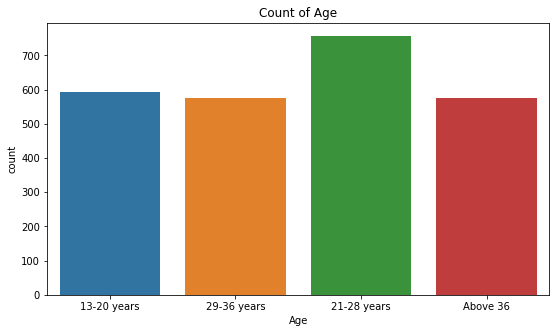

In [ ]:
# Bar Graph of user Age
fig, axes = plt.subplots(figsize=(9,5))
sns.countplot(x = "Age", data = df)
plt.title("Count of Age")
plt.show()

* More than 50% respondents are below 30.
* 757 respondents are from 21-28 years age group.          

### Q.   What is Work experience of respondent ?


In [ ]:
# renaming column name
df = df.rename(columns = {'Work experience ':'Work_experience'})

# Count of user Work experience
df.Work_experience.value_counts(normalize=True).to_frame()


,Work_experience
Below 5 years,0.2084
Still a student,0.1820
6-10 years,0.1648
11-15 years,0.1508
Unemployed,0.1500
16-20 years,0.1440


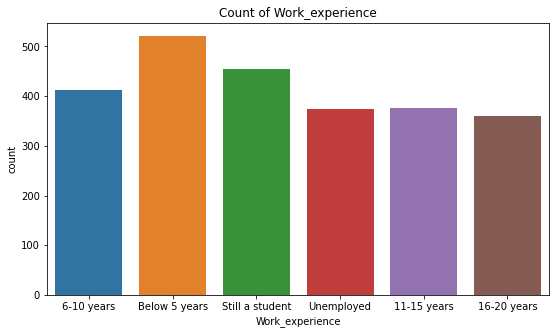

In [ ]:
# Bar Graph of user Work_experience
fig, axes = plt.subplots(figsize=(9,5))
sns.countplot(x = "Work_experience", data = df)
plt.title("Count of Work_experience")
plt.show()

* 20%  participats have less than 5 years of work experiance.
* 18%  participats are still student and 15% are unemployed.
* 14%  participats have more than 15 years of experiance.


### Q.   How many Socail media accounts participants have ?


In [ ]:
# Count of user Num_SMA
df.Num_SMA.value_counts().to_frame()

,Num_SMA
2-3,925
4-6,757
1,674
1,114
More than 6,30


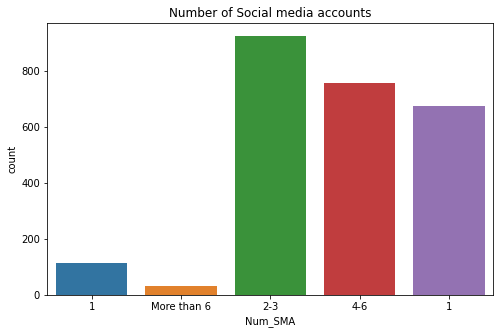

In [ ]:
# Bar Graph of user Num_SMA
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Num_SMA", data = df)
plt.title("Number of Social media accounts")
plt.show()

* Most of the participantd have 2-3 social media accounts and very less  have more than 6 social media accounts.

### Q.   How frequently participants use social media account ?



In [ ]:
# Count of user Freq_useSMA
df.Freq_useSMA.value_counts().to_frame()

,Freq_useSMA
2-5 times a day,587
5-10 times a day,508
10+ times,507
Once a day,487
Not daily,411


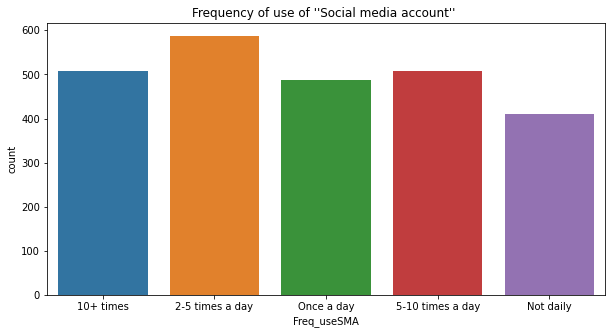

In [ ]:
# Bar Graph of user Freq_useSMA
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x = "Freq_useSMA", data = df)
plt.title("Frequency of use of ''Social media account'' ")
plt.show()

* Most of the participants use socail media account 2-5 times in a day.
* Most of the participants do not use socail media daily.

### Q.   How much time participants use on social media daily? 


In [ ]:
# Count of user time_spend_SM_perday
df.time_spend_SM_perday.value_counts().to_frame()

,time_spend_SM_perday
1-2 hours,540
30-60 minutes,537
Less than 30 minutes,501
3 hours & above,472
2-3 hours,450


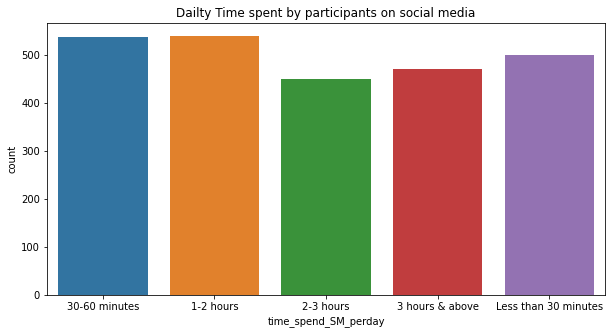

In [ ]:
# Bar Graph of user time_spend_SM_perday
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x = "time_spend_SM_perday", data = df)
plt.title("Dailty Time spent by participants on social media")
plt.show()

* Most of respondent spent time 30 minues to 2 hours daily on social media.

### Q.   How frequently participants do post on social media ?



In [ ]:
# Count of user freq_post_SM
df.freq_post_SM.value_counts().to_frame()

,freq_post_SM
Never,550
Every few months,505
Monthly,498
Weekly,482
Daily,465


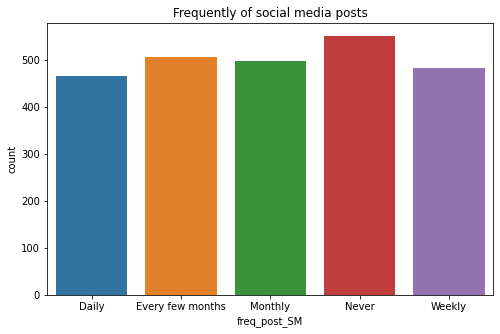

In [ ]:
# Bar Graph of user freq_post_SM
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "freq_post_SM", data = df)
plt.title("Frequently of social media posts")
plt.show()

* 550 respondents never post on social media.
* 456 respondents daily post on social media.

================================================================================

### Q.  Why respondents use social media ?


In [ ]:
# Count of user useof_SM
df.useof_SM.value_counts()

News/informative content                                                                                                                              279
Keeping in touch with friends and family, To browse, News/informative content                                                                         260
To browse                                                                                                                                             243
Keeping in touch with friends and family, To find employment                                                                                          243
Inspiration                                                                                                                                           243
                                                                                                                                                     ... 
Buying and selling, To meet new friends                                     

> Most of the participats use Social media to Keeping in touch with friends and family, News/informative content, Inspiration, To browse and To find employment   

### Q.   Salience ?



In [ ]:
# Count of user Salience
df.Salience.value_counts().to_frame()

,Salience
Very rarely,565
Sometimes,564
Rarely,543
Often,444
Very Often,384


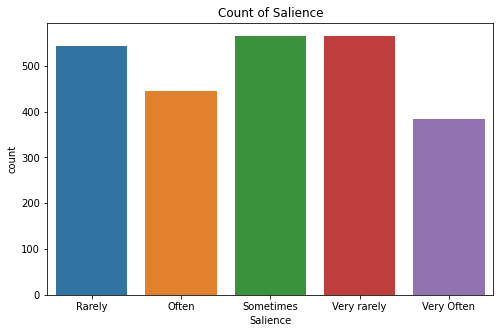

In [ ]:
# Bar Graph of Salience
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Salience", data = df)
plt.title("Count of Salience")
plt.show()

### Q.   Tolerance




In [ ]:
# Count of Tolerance
df.Tolerance.value_counts().to_frame()

,Tolerance
Very rarely,551
Rarely,547
Sometimes,505
Often,451
Very Often,446


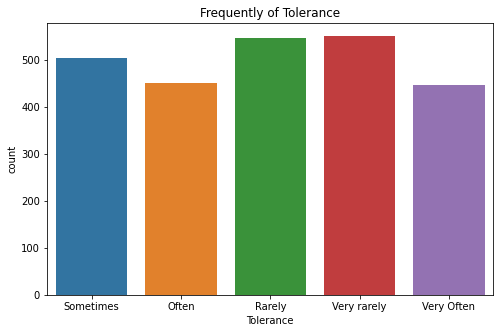

In [ ]:
# Bar Graph Tolerance
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Tolerance", data = df)
plt.title("Frequently of Tolerance")
plt.show()

### Q.   Mood_modifications



In [ ]:
# Count of Mood_modifications
df.Mood_modifications.value_counts().to_frame()

,Mood_modifications
Sometimes,575
Very rarely,568
Rarely,513
Often,447
Very Often,397


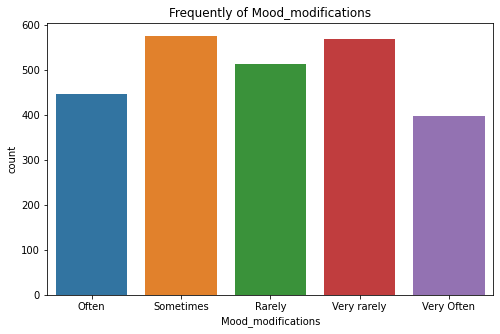

In [ ]:
# Bar Graph of Mood_modifications
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Mood_modifications", data = df)
plt.title("Frequently of Mood_modifications")
plt.show()

### Q.   Relapse



In [ ]:
# Count of Relapse
df.Relapse.value_counts().to_frame()

,Relapse
Sometimes,567
Rarely,547
Very rarely,525
Often,453
Very Often,408


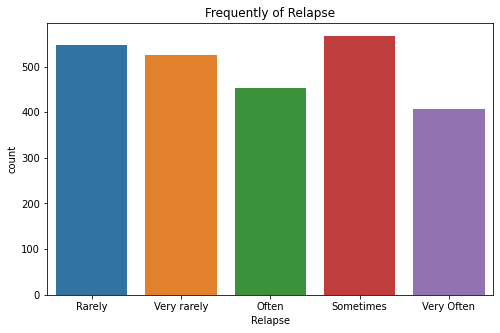

In [ ]:
# Bar Graph of Relapse
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Relapse", data = df)
plt.title("Frequently of Relapse")
plt.show()

### Q.  Withdrawal



In [ ]:
# Count of Withdrawal
df.Withdrawal.value_counts().to_frame()

,Withdrawal
Very rarely,592
Sometimes,551
Rarely,521
Very Often,423
Often,413


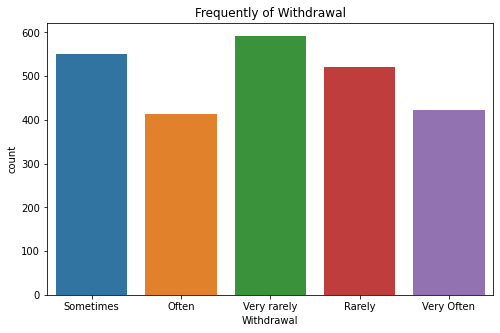

In [ ]:
# Bar Graph of Withdrawal
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Withdrawal", data = df)
plt.title("Frequently of Withdrawal")
plt.show()

### Q.   Conflict



In [ ]:
# Count of Conflict
df.Conflict.value_counts().to_frame()

,Conflict
Very rarely,570
Rarely,531
Sometimes,522
Often,462
Very Often,415


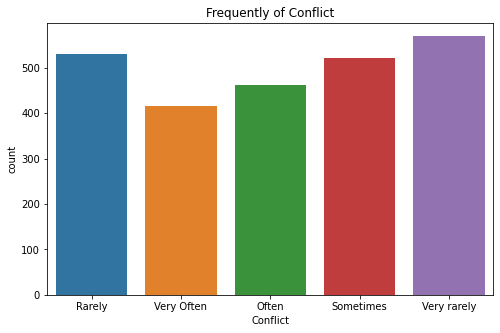

In [ ]:
# Bar Graph of Conflict
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Conflict", data = df)
plt.title("Frequently of Conflict")
plt.show()

### Q.   How may participants are Addicted to social media?



In [ ]:
# Count of Addicted_SM
df.Addicted_SM.value_counts().to_frame()

,Addicted_SM
No,1374
Yes,1126


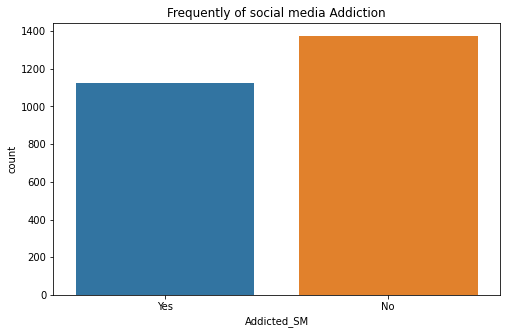

In [ ]:
# Bar Graph of Addicted_SM
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Addicted_SM", data = df)
plt.title("Frequently of social media Addiction")
plt.show()

* 55% participants are not addicted to social media.
* 45% participants are addicted to social media.

### Q.   How may respondents are sufferting from mental health ?



In [ ]:
# Count of suf_Mental_health
df.suf_Mental_health.value_counts().to_frame()

,suf_Mental_health
No,1438
Yes,1062


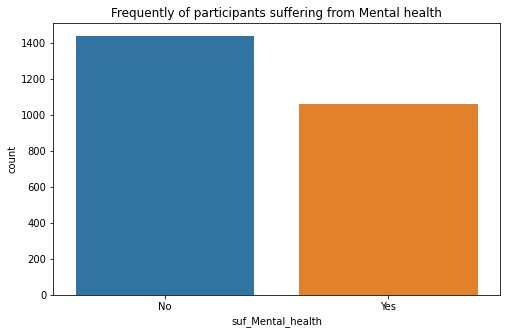

In [ ]:
# Bar Graph of suf_Mental_health
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "suf_Mental_health", data = df)
plt.title("Frequently of participants suffering from Mental health")
plt.show()

* 57.5% respondents do not have any mental health problem
* 42.5% respondents suffeting from mental health problem

### Q.   How may respondents are taking Medications ?




In [ ]:
# Count of Medications
df.Medications.value_counts().to_frame()

,Medications
No,1450
Yes,1050


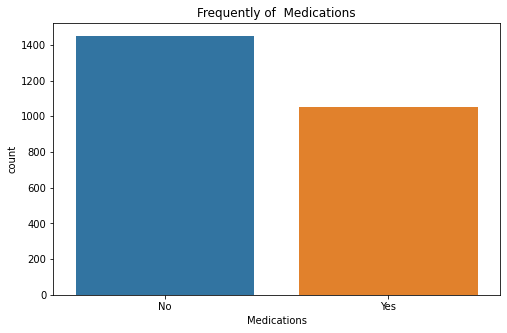

In [ ]:
# Bar Graph of Medications
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x = "Medications", data = df)
plt.title("Frequently of  Medications")
plt.show()

* 58% respondents do not take any type of medications
* 42% respondents takes medications

### Q What is average Stress Score?

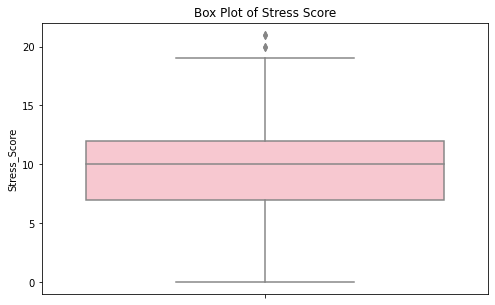

In [ ]:
# Box Plot of Stress_Score
fig, axes = plt.subplots(figsize=(8,5))
sns.boxplot(y='Stress_Score', data = df, color = 'pink')
plt.title('Box Plot of Stress Score')
plt.show()

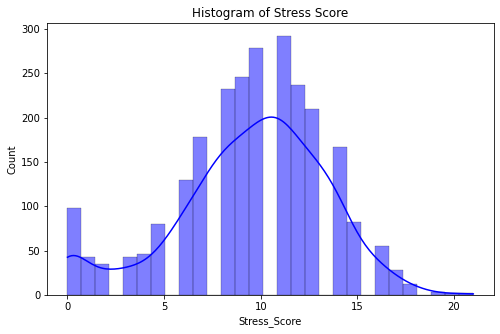

In [ ]:
#Histogram of Stress_Score
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(df['Stress_Score'], kde = True, linewidth=.2, color = 'blue')
plt.title('Histogram of Stress Score')
plt.show()

#### Observations

Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

* Stress Score have two outlies values
* Stress Scoreis close normally distributed.
* Average Stress Score is 9.5108




### Q What is average Anxiety Score?

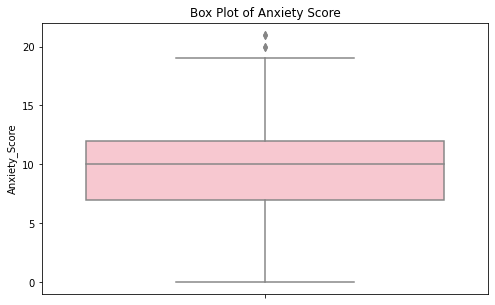

In [ ]:
# Box Plot of Anxiety_Score
fig, axes = plt.subplots(figsize=(8,5))
sns.boxplot(y='Anxiety_Score', data = df, color = 'pink')
plt.title('Box Plot of Anxiety Score')
plt.show()

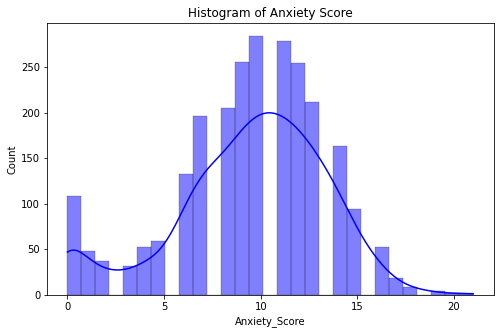

In [ ]:
#Histogram of Anxiety_Score
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(df['Anxiety_Score'], kde = True, linewidth=.2, color = 'blue')
plt.title('Histogram of Anxiety Score')
plt.show()

#### Observations

* Anxiety Score also have two outlies values
* Anxiety_Score is close normally distributed.
* Average Stress Score is 9.4824.




### Q What is average Depression Scoree?

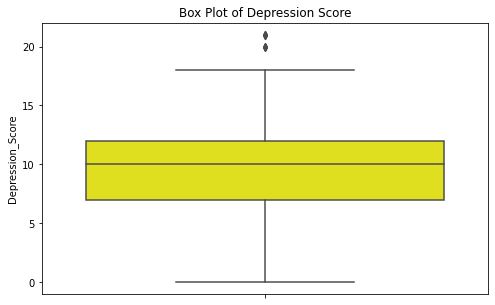

In [ ]:
# Box Plot of Depression_Score
fig, axes = plt.subplots(figsize=(8,5))
sns.boxplot(y='Depression_Score', data = df, color = 'yellow')
plt.title('Box Plot of Depression Score')
plt.show()

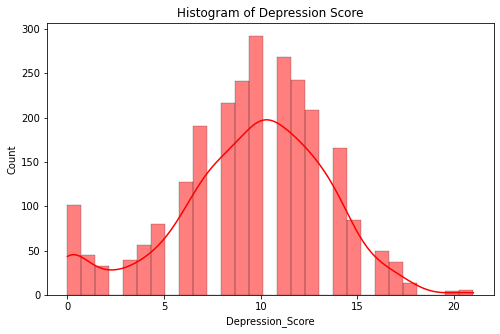

In [ ]:
#Histogram of Depression_Score
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(df['Depression_Score'], kde = True, linewidth=.2, color = 'red')
plt.title('Histogram of Depression Score')
plt.show()

#### Observations

* Depression Score also have two outlies values
* Depression Score is close to *normally* distributed.
* Average Stress Score is 9.5140

### Q What is average computed feature ?

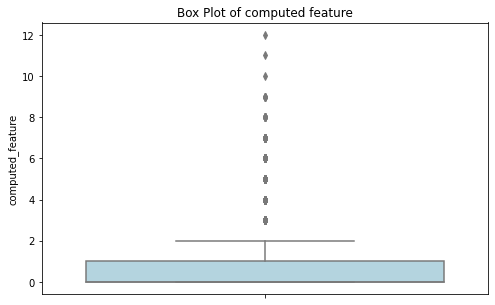

In [ ]:
# Box Plot of Stress_Score
fig, axes = plt.subplots(figsize=(8,5))
sns.boxplot(y='computed_feature', data = df, color = 'lightblue')
plt.title('Box Plot of computed feature')
plt.show()

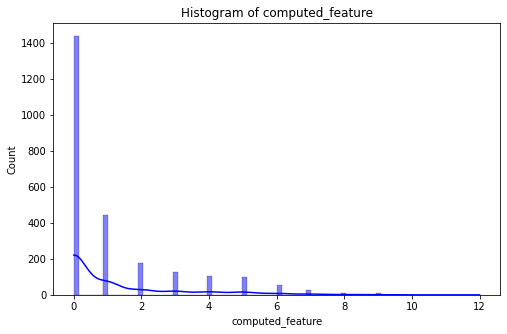

In [ ]:
# Histogram of computed feature
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(df['computed_feature'], kde = True, linewidth=.2, color = 'blue')
plt.title('Histogram of computed_feature')
plt.show()

#### Observations


* Computed feature have lots of outlies.
* Computed feature is positive skew.
* Computed feature have lots of zeros.






---



---



---




# Bivariate Analysis

In [ ]:
df["Gender"] = df["Gender"].replace({"Prefer not to say": "Male"})

df1 = df[['suf_Mental_health', 'Gender']].groupby(['suf_Mental_health', 'Gender']).size().reset_index()
df1

,suf_Mental_health,Gender,0
0,No,Female,708
1,No,Male,730
2,Yes,Female,555
3,Yes,Male,507


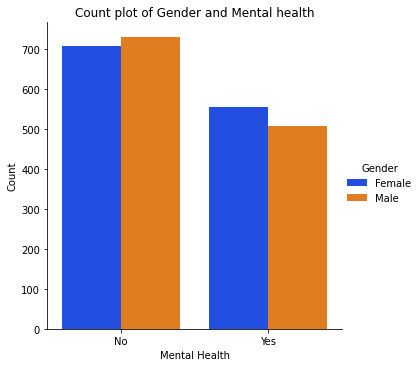

In [ ]:
#Count plot of Gender and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="Gender", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Gender and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Gender, margins = True)
stats.chi2_contingency(observed= ct)

(2.235911943022503,
 0.6924602022035382,
 4,
 array([[ 726.4776,  711.5224, 1438.    ],
        [ 536.5224,  525.4776, 1062.    ],
        [1263.    , 1237.    , 2500.    ]]))

* Above table and bar graph shows, Mental health or not suffering from Mental health have almost same number of male and females.

* ChiSquar test result shows that p value (0.6924) is greater than 0.05 and statistically insignidicant. This shows Gender and Mental health are independebt i.e. there is no association between Gender and Mental health.

------------------------------------------------------------------------------

## Q. Does Age have any impact on Mental health ?

In [ ]:
df1 = df[['suf_Mental_health', 'Age']].groupby(['suf_Mental_health', 'Age']).size().reset_index()
df1

,suf_Mental_health,Age,0
0,No,13-20 years,342
1,No,21-28 years,490
2,No,29-36 years,310
3,No,Above 36,296
4,Yes,13-20 years,250
5,Yes,21-28 years,267
6,Yes,29-36 years,266
7,Yes,Above 36,279


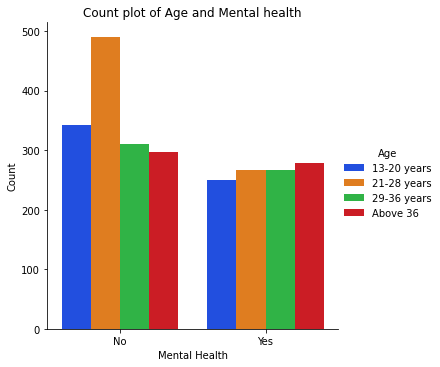

In [ ]:
#Count plot of Age and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="Age", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Age and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Age, margins = True)
stats.chi2_contingency(observed= ct)

(27.93471080872593,
 0.0004868233667568348,
 8,
 array([[ 340.5184,  435.4264,  331.3152,  330.74  , 1438.    ],
        [ 251.4816,  321.5736,  244.6848,  244.26  , 1062.    ],
        [ 592.    ,  757.    ,  576.    ,  575.    , 2500.    ]]))

* Above table and bar graph shows, Age group impacted individuals suffering from Mental health.

* Megority Individuals from age group 21-28 years, did not suffering from mental health problem.

* ChiSquar test result shows that p value (0.00048) is less than 0.05 and statistically signidicant. This shows Mental health depends on Age i.e. there is significant association between Age and Mental health.

------------------------------------------------------------------------------

## Q. Does Mental health have any assiciation with Work_experience ?

In [ ]:
df1 = df[['suf_Mental_health', 'Work_experience']].groupby(['suf_Mental_health', 'Work_experience']).size().reset_index()
df1

,suf_Mental_health,Work_experience,0
0,No,11-15 years,197
1,No,16-20 years,193
2,No,6-10 years,242
3,No,Below 5 years,344
4,No,Still a student,271
5,No,Unemployed,191
6,Yes,11-15 years,180
7,Yes,16-20 years,167
8,Yes,6-10 years,170
9,Yes,Below 5 years,177


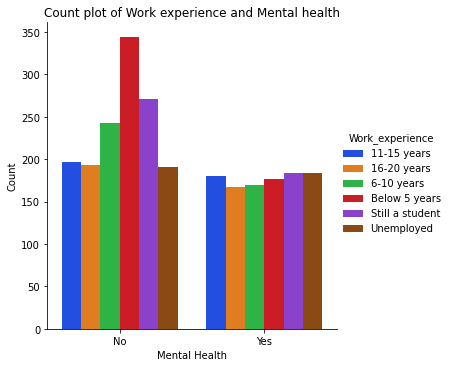

In [ ]:
#Count plot of Work_experience and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="Work_experience", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Work experience and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Work_experience, margins = True)
stats.chi2_contingency(observed= ct)

(29.642582233573858,
 0.0031597778749089677,
 12,
 array([[ 216.8504,  207.072 ,  236.9824,  299.6792,  261.716 ,  215.7   ,
         1438.    ],
        [ 160.1496,  152.928 ,  175.0176,  221.3208,  193.284 ,  159.3   ,
         1062.    ],
        [ 377.    ,  360.    ,  412.    ,  521.    ,  455.    ,  375.    ,
         2500.    ]]))

* Above table and bar graph shows, Individuals have work experiance Below 5 years and studets are more Mentaly fit.

* ChiSquar test result shows, For ChiSquar value (29.64) p value (0.003159) is less than 0.05 and statistically signidicant. This shows Mental health and  work experiance have significant association, i.e. work experiance affects Mental health.

------------------------------------------------------------------------------

## Q. Does Number of Social media accounts have any impact on Mental health ?

In [ ]:
df["Num_SMA"] = df["Num_SMA"].replace({"1": 1, 'More than 6': '4-6'})

df1 = df[['suf_Mental_health', 'Num_SMA']].groupby(['suf_Mental_health', 'Num_SMA']).size().reset_index()
df1

,suf_Mental_health,Num_SMA,0
0,No,1,429
1,No,2-3,554
2,No,4-6,455
3,Yes,1,359
4,Yes,2-3,371
5,Yes,4-6,332


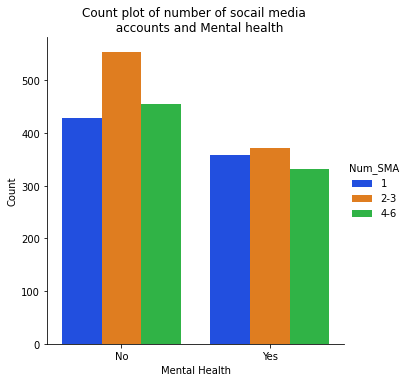

In [ ]:
#Count plot of number of socail media accounts and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="Num_SMA", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of number of socail media \n  accounts and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Num_SMA, margins = True)
stats.chi2_contingency(observed= ct)

(5.213768773219917,
 0.5167026633759548,
 6,
 array([[ 453.2576,  532.06  ,  452.6824, 1438.    ],
        [ 334.7424,  392.94  ,  334.3176, 1062.    ],
        [ 788.    ,  925.    ,  787.    , 2500.    ]]))

* **bold text** Individuals have 2-3 social media accounts are not suffering from any mental health.

* ChiSquar test result shows, for ChiSquar value (5.21) p value (0.516) is greater than 0.05 and statistically insignidicant. This shows number of social media accounts and Mental health are independent i.e. there is no association between number of social media accounts and Mental health.

------------------------------------------------------------------------------

## Q. Does frequency of social media accounts use have impact on Mental health ?

In [ ]:
df1 = df[['suf_Mental_health', 'Freq_useSMA']].groupby(['suf_Mental_health', 'Freq_useSMA']).size().reset_index()
df1

,suf_Mental_health,Freq_useSMA,0
0,No,10+ times,291
1,No,2-5 times a day,353
2,No,5-10 times a day,287
3,No,Not daily,222
4,No,Once a day,285
5,Yes,10+ times,216
6,Yes,2-5 times a day,234
7,Yes,5-10 times a day,221
8,Yes,Not daily,189
9,Yes,Once a day,202


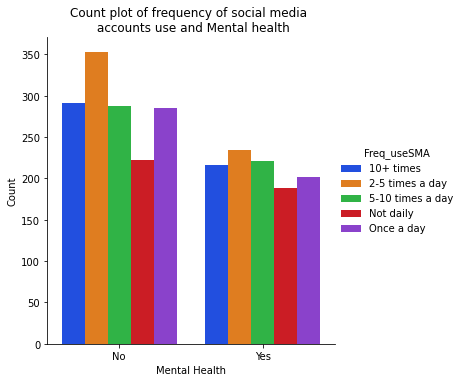

In [ ]:
#Count plot of frequency of social media accounts use and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="Freq_useSMA", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of frequency of social media \n accounts use and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Freq_useSMA, margins = True)
stats.chi2_contingency(observed= ct)

(4.132338615827348,
 0.9411795099009184,
 10,
 array([[ 291.6264,  337.6424,  292.2016,  236.4072,  280.1224, 1438.    ],
        [ 215.3736,  249.3576,  215.7984,  174.5928,  206.8776, 1062.    ],
        [ 507.    ,  587.    ,  508.    ,  411.    ,  487.    , 2500.    ]]))

* Individuals using social media accounts 2-3 times in a day looks more mentaly fit.

* ChiSquar test result shows, for ChiSquar value (4.13), p value (0.94) is greater than 0.05 and statistically insignificant. This shows number of time using social media accounts and Mental health are independent i.e. there is no association between number of time using social media and Mental health.

------------------------------------------------------------------------------

## Q. Does amount of time individuals spend on Social media every day have any impact on Mental health ?

In [ ]:
df1 = df[['suf_Mental_health', 'time_spend_SM_perday']].groupby(['suf_Mental_health', 'time_spend_SM_perday']).size().reset_index()
df1

,suf_Mental_health,time_spend_SM_perday,0
0,No,1-2 hours,328
1,No,2-3 hours,242
2,No,3 hours & above,275
3,No,30-60 minutes,324
4,No,Less than 30 minutes,269
5,Yes,1-2 hours,212
6,Yes,2-3 hours,208
7,Yes,3 hours & above,197
8,Yes,30-60 minutes,213
9,Yes,Less than 30 minutes,232


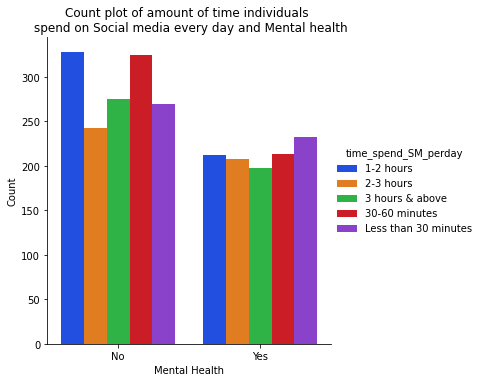

In [ ]:
#Count plot of amount of time individuals spend on Social media every day and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="time_spend_SM_perday", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of amount of time individuals \n spend on Social media every day and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.time_spend_SM_perday, margins = True)
stats.chi2_contingency(observed= ct)

(9.72345298654205,
 0.4650815719927561,
 10,
 array([[ 310.608 ,  258.84  ,  271.4944,  308.8824,  288.1752, 1438.    ],
        [ 229.392 ,  191.16  ,  200.5056,  228.1176,  212.8248, 1062.    ],
        [ 540.    ,  450.    ,  472.    ,  537.    ,  501.    , 2500.    ]]))

* Individuals spending less than 30 minutes or 30-60 minutes in a day looks more mentaly fit.

* ChiSquar test result shows, for ChiSquar value (9.72), p value (0.465) is greater than 0.05 and statistically insignificant. This shows amount of time individuals spend on Social media every day and Mental health are independent i.e. there is no association between amount of time individuals spend on Social media every day and Mental health.

------------------------------------------------------------------------------

## Q. Does how frequently individuals post on Social media impact on Mental health ?

In [ ]:
df1 = df[['suf_Mental_health', 'freq_post_SM']].groupby(['suf_Mental_health', 'freq_post_SM']).size().reset_index()
df1

,suf_Mental_health,freq_post_SM,0
0,No,Daily,269
1,No,Every few months,297
2,No,Monthly,268
3,No,Never,325
4,No,Weekly,279
5,Yes,Daily,196
6,Yes,Every few months,208
7,Yes,Monthly,230
8,Yes,Never,225
9,Yes,Weekly,203


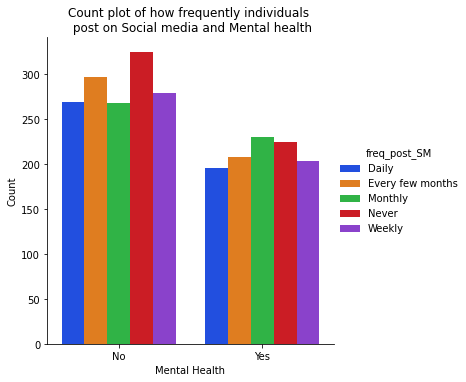

In [ ]:
#Count plot of how frequently individuals post on Social media and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="freq_post_SM", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of how frequently individuals \n post on Social media and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.freq_post_SM, margins = True)
stats.chi2_contingency(observed= ct)

(3.744483448353055,
 0.9581384756094604,
 10,
 array([[ 267.468 ,  290.476 ,  286.4496,  316.36  ,  277.2464, 1438.    ],
        [ 197.532 ,  214.524 ,  211.5504,  233.64  ,  204.7536, 1062.    ],
        [ 465.    ,  505.    ,  498.    ,  550.    ,  482.    , 2500.    ]]))

* Individuals who never post or post every few months	on social media looks more mentaly fit.

* ChiSquar test result shows, for ChiSquar value (6.85), p value (0.334) is greater than 0.05 and statistically insignificant. This shows frequency of posts on Social media and Mental health are independent i.e. there is no association between frequency of posts on Social media every day and Mental health.

------------------------------------------------------------------------------

------------------------------------------------------------------------------

## Q. Salience and Mental health

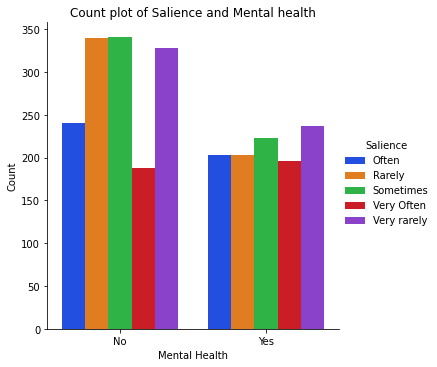

In [ ]:
#Count plot of Gender and Mental health

df1 = df[['suf_Mental_health', 'Salience']].groupby(['suf_Mental_health', 'Salience']).size().reset_index()
sns.catplot(x="suf_Mental_health", y = 0, hue="Salience", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Salience and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Salience, margins = True)
stats.chi2_contingency(observed= ct)

(21.259367168551613,
 0.01935584536927366,
 10,
 array([[ 255.3888,  312.3336,  324.4128,  220.8768,  324.988 , 1438.    ],
        [ 188.6112,  230.6664,  239.5872,  163.1232,  240.012 , 1062.    ],
        [ 444.    ,  543.    ,  564.    ,  384.    ,  565.    , 2500.    ]]))

* ChiSquar test result shows that p value (0.019) is less than 0.05 and statistically significant. There is association between Salience and Mental health.

## Q. Tolerance and Mental health

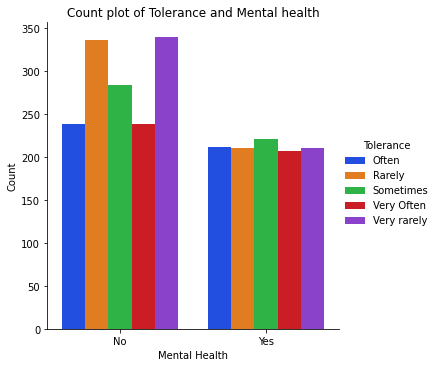

In [ ]:
#Count plot of Tolerance and Mental health

df1 = df[['suf_Mental_health', 'Tolerance']].groupby(['suf_Mental_health', 'Tolerance']).size().reset_index()

sns.catplot(x="suf_Mental_health", y = 0, hue="Tolerance", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Tolerance and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Tolerance, margins = True)
stats.chi2_contingency(observed= ct)

(14.31145684936196,
 0.1592532091940621,
 10,
 array([[ 259.4152,  314.6344,  290.476 ,  256.5392,  316.9352, 1438.    ],
        [ 191.5848,  232.3656,  214.524 ,  189.4608,  234.0648, 1062.    ],
        [ 451.    ,  547.    ,  505.    ,  446.    ,  551.    , 2500.    ]]))

* ChiSquar test result shows that p value (0.159) is greater than 0.05 and statistically insignidicant. There is no association between Tolerance and Mental health.

## Q. Mood_modifications and Mental health

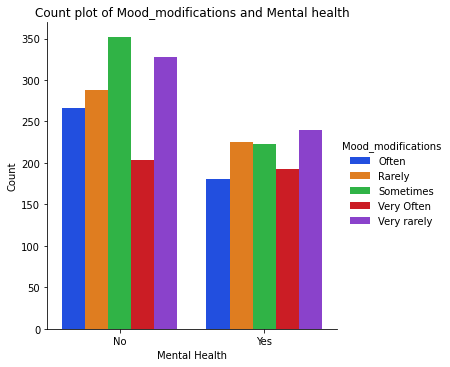

In [ ]:
#Count plot of Mood_modifications and Mental health

df1 = df[['suf_Mental_health', 'Mood_modifications']].groupby(['suf_Mental_health', 'Mood_modifications']).size().reset_index()

sns.catplot(x="suf_Mental_health", y = 0, hue="Mood_modifications", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Mood_modifications and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Mood_modifications, margins = True)
stats.chi2_contingency(observed= ct)

(10.465952872076004,
 0.4006070806314829,
 10,
 array([[ 257.1144,  295.0776,  330.74  ,  228.3544,  326.7136, 1438.    ],
        [ 189.8856,  217.9224,  244.26  ,  168.6456,  241.2864, 1062.    ],
        [ 447.    ,  513.    ,  575.    ,  397.    ,  568.    , 2500.    ]]))

> ChiSquar test result shows that p value (0.400) is greater than 0.05 and statistically insignidicant. There is no association between Mood_modifications and Mental health.

## Q. Relapse and Mental health

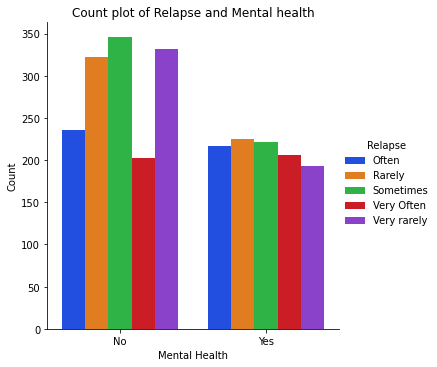

In [ ]:
#Count plot of Gender and Mental health

df1 = df[['suf_Mental_health', 'Relapse']].groupby(['suf_Mental_health', 'Relapse']).size().reset_index()
sns.catplot(x="suf_Mental_health", y = 0, hue="Relapse", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Relapse and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Relapse, margins = True)
stats.chi2_contingency(observed= ct)

(26.444218510357075,
 0.003186507666388437,
 10,
 array([[ 260.5656,  314.6344,  326.1384,  234.6816,  301.98  , 1438.    ],
        [ 192.4344,  232.3656,  240.8616,  173.3184,  223.02  , 1062.    ],
        [ 453.    ,  547.    ,  567.    ,  408.    ,  525.    , 2500.    ]]))

* ChiSquar test result shows that p value (0.003) is less than 0.05 and statistically signidicant. There is association between Relapse and Mental health.

## Q. Withdrawal and Mental health

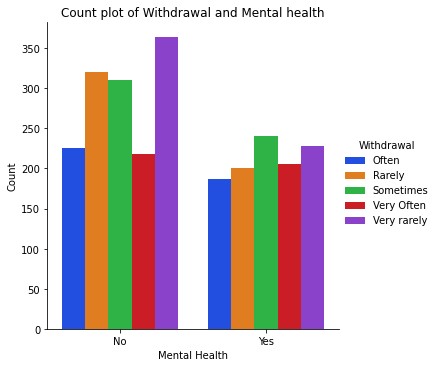

In [ ]:
#Count plot of Gender and Mental health

df1 = df[['suf_Mental_health', 'Withdrawal']].groupby(['suf_Mental_health', 'Withdrawal']).size().reset_index()

sns.catplot(x="suf_Mental_health", y = 0, hue="Withdrawal", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Withdrawal and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Withdrawal, margins = True)
stats.chi2_contingency(observed= ct)

(14.934065725274722,
 0.1344842561191027,
 10,
 array([[ 237.5576,  299.6792,  316.9352,  243.3096,  340.5184, 1438.    ],
        [ 175.4424,  221.3208,  234.0648,  179.6904,  251.4816, 1062.    ],
        [ 413.    ,  521.    ,  551.    ,  423.    ,  592.    , 2500.    ]]))

* ChiSquar test result shows that p value (.134) is greater than 0.05 and statistically insignidicant. There is no association between Withdrawal and Mental health.

## Q. Conflict and Mental health

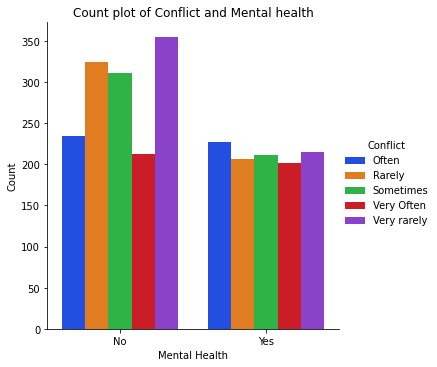

In [ ]:
#Count plot of Gender and Mental health

df1 = df[['suf_Mental_health', 'Conflict']].groupby(['suf_Mental_health', 'Conflict']).size().reset_index()

sns.catplot(x="suf_Mental_health", y = 0, hue="Conflict", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Conflict and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Conflict, margins = True)
stats.chi2_contingency(observed= ct)

(23.739397423445524,
 0.008322982735822259,
 10,
 array([[ 265.7424,  305.4312,  300.2544,  238.708 ,  327.864 , 1438.    ],
        [ 196.2576,  225.5688,  221.7456,  176.292 ,  242.136 , 1062.    ],
        [ 462.    ,  531.    ,  522.    ,  415.    ,  570.    , 2500.    ]]))

* ChiSquar test result shows that p value (0.008) is less than 0.05 and statistically signidicant. There is association between Conflict and Mental health.

------------------------------------------------------------------------------

## Q. How is Mental health of individuals addicted to social media?

In [ ]:
df1 = df[['suf_Mental_health', 'Addicted_SM']].groupby(['suf_Mental_health', 'Addicted_SM']).size().reset_index()
df1

,suf_Mental_health,Addicted_SM,0
0,No,No,839
1,No,Yes,599
2,Yes,No,535
3,Yes,Yes,527


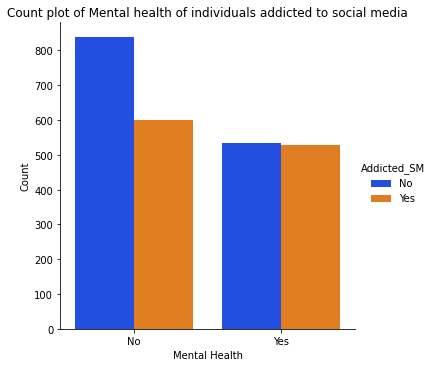

In [ ]:
#Count plot of Gender and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="Addicted_SM", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Mental health of individuals addicted to social media")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Addicted_SM, margins = True)
stats.chi2_contingency(observed= ct)

(15.668484391088107,
 0.0034978497149273716,
 4,
 array([[ 790.3248,  647.6752, 1438.    ],
        [ 583.6752,  478.3248, 1062.    ],
        [1374.    , 1126.    , 2500.    ]]))

* High number of Individuals not addicted to social media not suffering from any Mental health.

* ChiSquar test result shows, for chisquar (15.668), p value (0.003) is less than 0.05 and statistically signidicant. This shows Mental health and individuals addicted to social media are association. 

------------------------------------------------------------------------------

## Q. Does Medications and any association with Mental health ?

In [ ]:
df1 = df[['suf_Mental_health', 'Medications']].groupby(['suf_Mental_health', 'Medications']).size().reset_index()
df1

,suf_Mental_health,Medications,0
0,No,No,920
1,No,Yes,518
2,Yes,No,530
3,Yes,Yes,532


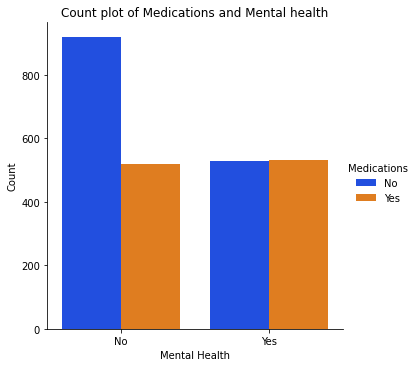

In [ ]:
#Count plot of Medications and Mental health
sns.catplot(x="suf_Mental_health", y = 0, hue="Medications", data=df1,
               kind="bar", palette="bright")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.title("Count plot of Medications and Mental health")
plt.show()

In [ ]:
# ChiSquar test
ct = pd.crosstab(df.suf_Mental_health, df.Medications, margins = True)
stats.chi2_contingency(observed= ct)

(49.65604609852052,
 4.2600800358273476e-10,
 4,
 array([[ 834.04,  603.96, 1438.  ],
        [ 615.96,  446.04, 1062.  ],
        [1450.  , 1050.  , 2500.  ]]))


> ChiSquar test result shows, for chisquar (6.85), p value is less than 0.05 and statistically significant. This shows Mental health and Medications have association.

------------------------------------------------------------------------------

## Q. Average Anxiety_Score by mental health status

In [ ]:
# Average Anxiety_Score by mental health status

df[['suf_Mental_health', 'Anxiety_Score']].groupby(['suf_Mental_health']).mean()

,Anxiety_Score
suf_Mental_health,
No,8.729485
Yes,10.501883


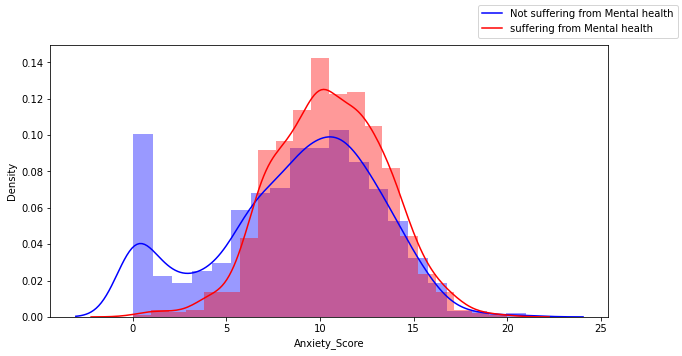

In [ ]:
# Distribution plot of Anxiety_Score by mental health status

fig, axes = plt.subplots(figsize=(10,5))
sns.distplot(df[df['suf_Mental_health']== "No"]["Anxiety_Score"], label='Not suffering from Mental health', color='blue', hist=True, norm_hist=False)
sns.distplot(df[df['suf_Mental_health']== "Yes"]["Anxiety_Score"], label='Suffering from Mental health', color='red', hist=True, norm_hist=False)
fig.legend(labels=['Not suffering from Mental health','suffering from Mental health'])
plt.show()

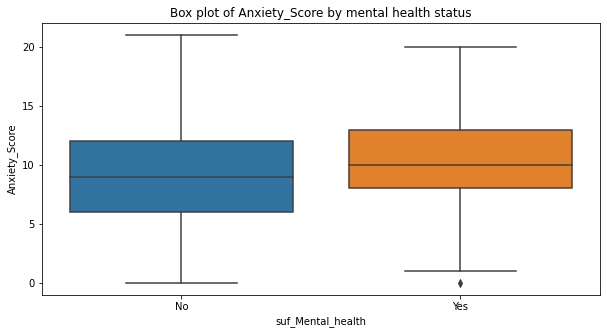

In [ ]:
# Box plot of Anxiety_Score by mental health status

fig, axes = plt.subplots(figsize=(10,5))
sns.boxplot(x='suf_Mental_health', y='Anxiety_Score', data = df)
plt.title('Box plot of Anxiety_Score by mental health status')
plt.show()

In [ ]:
## Independent sample t test:

## Seprating data by Anxiety Score and Mental health

suff_MH = df.Anxiety_Score[df.suf_Mental_health == 'Yes']
Nosuff_MH = df.Anxiety_Score[df.suf_Mental_health == 'No']


## Independent sample t test:
stats.ttest_ind(a= suff_MH ,
                b= Nosuff_MH)



Ttest_indResult(statistic=11.420085134058457, pvalue=1.764188312037074e-29)

## Observations :
* Average Anxiety Score of individual suffering by mental health problem is 10.502
* Average Anxiety Score  of individual not suffering by any mental health problem is 8.73
* Average Anxiety Score also higher for individual suffering by mental health problem.
* When Anxiety Score are low, individuals are not suffering from any mental health problem but when Anxiety Score increases more individuals suffering from mental health problem.

* Since p value is less than the our designated significance level of alpha=0.05, then we may conclude that the result is statistically significant.

* From the hypothesis testing result, t statistics value is 11.42 and p value is less than 0.05 , very closer to zero, hence average Anxiety Score is higher for individual suffering by mental health problem.


## Q. Average Stress_Score by mental health status

In [ ]:
# Average Stress_Score by mental health status

df[['suf_Mental_health', 'Stress_Score']].groupby(['suf_Mental_health']).mean()

,Stress_Score
suf_Mental_health,
No,8.715577
Yes,10.587571


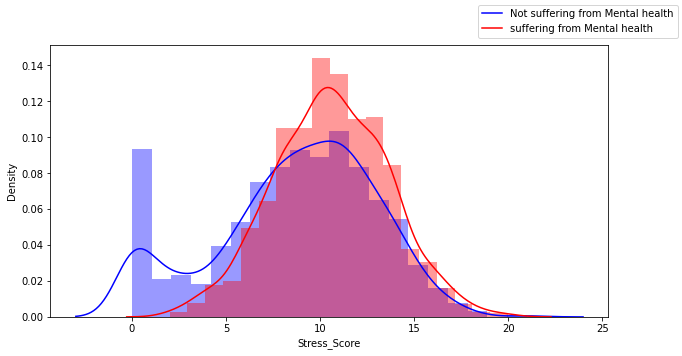

In [ ]:
# Distribution plot of Stress_Score by mental health status

fig, axes = plt.subplots(figsize=(10,5))
sns.distplot(df[df['suf_Mental_health']== "No"]["Stress_Score"], label='Not suffering from Mental health', color='blue', hist=True, norm_hist=False)
sns.distplot(df[df['suf_Mental_health']== "Yes"]["Stress_Score"], label='Suffering from Mental health', color='red', hist=True, norm_hist=False)
fig.legend(labels=['Not suffering from Mental health','suffering from Mental health'])
plt.show()

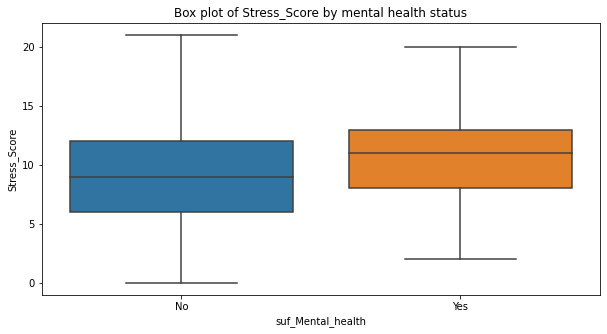

In [ ]:
# Box plot of Stress_Score by mental health status

fig, axes = plt.subplots(figsize=(10,5))
sns.boxplot(x='suf_Mental_health', y='Stress_Score', data = df)
plt.title('Box plot of Stress_Score by mental health status')
plt.show()

In [ ]:
## Independent sample t test:

## Seprating data by time spent and landing_page

suff_MH = df.Stress_Score[df.suf_Mental_health == 'Yes']
Nosuff_MH = df.Stress_Score[df.suf_Mental_health == 'No']


## Independent sample t test:
stats.ttest_ind(a= suff_MH ,
                b= Nosuff_MH)



Ttest_indResult(statistic=12.17753007101259, pvalue=3.501995377806912e-33)

## Observations :
* Average Stress Score of individual suffering by mental health problem is 10.59
* Average Stress Score of individual not suffering by any mental health problem is 8.72
* Average Stress Score is higher for individual suffering by mental health problem.
* When stress score are low, individuals are not suffering from any mental health problem but when stress score increases more individuals suffering from mental health problem.

* Since p value is less than the our designated significance level of alpha=0.05, then we may conclude that the result is statistically significant.

* From the hypothesis testing result, t statistics value is 12.177 and p value is less than 0.05 , very closer to zero, hence average Stress Score is higher for individual suffering by mental health problem.


## Q. Average Depression_Score by mental health status

In [ ]:
# Average Depression_Score by mental health status

df[['suf_Mental_health', 'Depression_Score']].groupby(['suf_Mental_health']).mean()

,Depression_Score
suf_Mental_health,
No,8.767733
Yes,10.524482


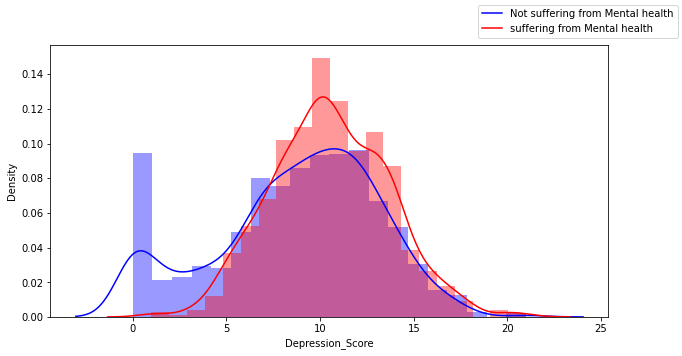

In [ ]:
# Distribution plot of Depression_Score by mental health status

fig, axes = plt.subplots(figsize=(10,5))
sns.distplot(df[df['suf_Mental_health']== "No"]["Depression_Score"], label='Not suffering from Mental health', color='blue', hist=True, norm_hist=False)
sns.distplot(df[df['suf_Mental_health']== "Yes"]["Depression_Score"], label='Suffering from Mental health', color='red', hist=True, norm_hist=False)
fig.legend(labels=['Not suffering from Mental health','suffering from Mental health'])
plt.show()

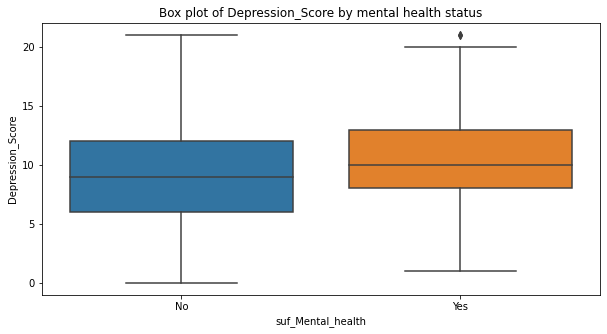

In [ ]:
# Box plot of Depression_Score by mental health status

fig, axes = plt.subplots(figsize=(10,5))
sns.boxplot(x='suf_Mental_health', y='Depression_Score', data = df)
plt.title('Box plot of Depression_Score by mental health status')
plt.show()

In [ ]:
## Independent sample t test:

## Seprating data by Depression_Score and Mental_health

suff_MH = df.Depression_Score[df.suf_Mental_health == 'Yes']
Nosuff_MH = df.Depression_Score[df.suf_Mental_health == 'No']


## Independent sample t test:
stats.ttest_ind(a= suff_MH ,
                b= Nosuff_MH)



Ttest_indResult(statistic=11.205205963706888, pvalue=1.8135116688938003e-28)

## Observations :
* Average Depression Score of individual suffering by mental health problem is 10.53
* Average Depression Score of individual not suffering by any mental health problem is 8.77
* Average Depression Score is higher for individual suffering by mental health problem.
* When Depression Score are low, individuals are not suffering from any mental health problem but when Depression Score increases more individuals suffering from mental health problem.

* Since p value is less than the our designated significance level of alpha=0.05, then we may conclude that the result is statistically significant.

* From the hypothesis testing result, t statistics value is 11.20 and p value is less than 0.05 , very closer to zero, hence average Depression Score is higher for individual suffering by mental health problem.


## Q. Is mean of computed feature differet for individuals sufferting mental health?

In [ ]:
# Average computed feature by mental health status

df[['suf_Mental_health', 'computed_feature']].groupby(['suf_Mental_health']).mean()

,computed_feature
suf_Mental_health,
No,0.000000
Yes,2.666667


In [ ]:
df['computed_feature'].value_counts()

0     1438
1      445
2      178
3      128
4      106
5      100
6       53
7       28
8       13
9        8
11       1
12       1
10       1
Name: computed_feature, dtype: int64

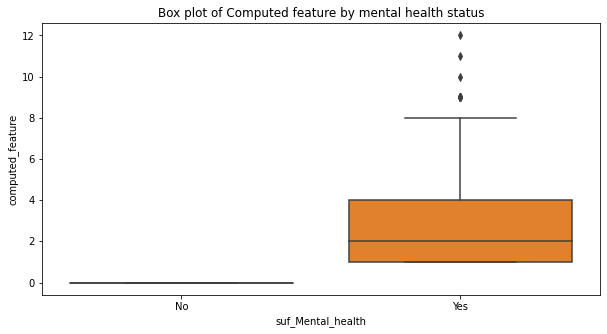

In [ ]:
# Box plot of Computed feature by mental health status

fig, axes = plt.subplots(figsize=(10,5))
sns.boxplot(x='suf_Mental_health', y='computed_feature', data = df)
plt.title('Box plot of Computed feature by mental health status')
plt.show()

In [ ]:
## Independent sample t test:

## Seprating data by computed_feature and landing_page

suff_MH = df.computed_feature[df.suf_Mental_health == 'Yes']
Nosuff_MH = df.computed_feature[df.suf_Mental_health == 'No']


## Independent sample t test:
stats.ttest_ind(a= suff_MH ,
                b= Nosuff_MH)



Ttest_indResult(statistic=51.583764804135015, pvalue=0.0)

## Observations :

* Since p value is less than the our designated significance level of alpha=0.05, then we may conclude that the result is statistically significant.

* From the hypothesis testing result, t statistics value is 51.58 and p value (0) is less than 0.05 , hence average computed feature is higher for individual suffering by mental health problem.


## Q - How duration of time spent on Social media related to depression, anxiety and stress ?

In [ ]:
# Average
df11 = df[['time_spend_SM_perday', 'Stress_Score',	'Anxiety_Score',	'Depression_Score']].groupby(['time_spend_SM_perday']).mean()
df11

,Stress_Score,Anxiety_Score,Depression_Score
time_spend_SM_perday,,,
1-2 hours,9.285185,9.581481,9.301852
2-3 hours,10.002222,10.037778,9.953333
3 hours & above,9.898305,9.692797,9.944915
30-60 minutes,9.182495,9.065177,9.346369
Less than 30 minutes,9.299401,9.125749,9.121756


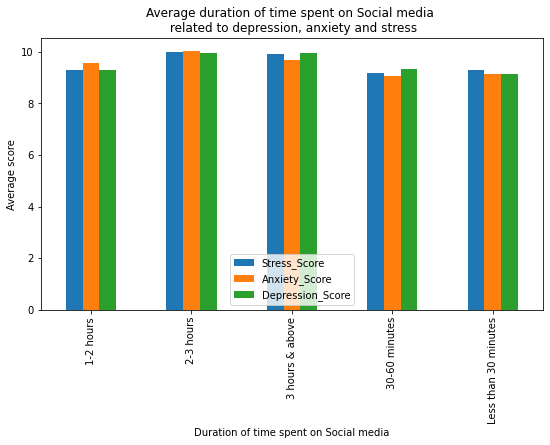

In [ ]:
#plot
from IPython.core.pylabtools import figsize
df11.plot(kind = "bar", figsize = (9,5))
plt.title('Average duration of time spent on Social media \n related to depression, anxiety and stress')
plt.xlabel("Duration of time spent on Social media")
plt.ylabel("Average score")
plt.show()

## Observations:
* Anxiety score were higher if individuals spending 1-2 hours on social media.
* Depression score were higher if individuals spending 30-60 minutes hours on social media.
* Stress score were higher if individuals spending less than 30 minutes hours on social media.


### Correlation heatmap

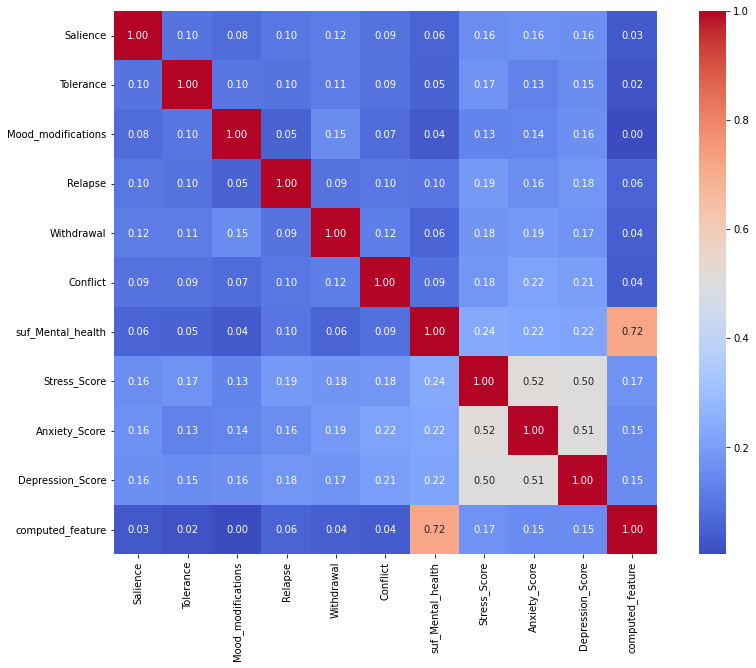

In [ ]:
# Correlation plot with heat map - Heatmap will be easy to read and understand.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Observations:
* Computes feature have strong correlation with Mental health.
* Mental health have possitve relationshship with relapse, depression, anxiety and stress.


## Conclusion based on the dataset :

1. Most of the participats use Social media to Keeping in touch with friends and family, News/informative content, Inspiration, To browse and To find employment.

2. Most of respondent spent time 30 minues to 2 hours daily on social media and use socail media account 2-5 times in a day.

3. Gender and Mental health are independebt i.e. there is no association between Gender and Mental health.

4. Mental health depends on Age i.e. there is significant association between Age and Mental health.

5. Mental health and work experiance have significant association, i.e. work experiance affects Mental health.Individuals have work experiance Below 5 years and studets are more Mentaly fit.

6. Number of social media accounts, number of time using social media accounts, amount of time individuals spend on Social media every day, frequency of posts on Social media have no impact on Mental health.

7. Salience, Relapse and Conflict have significant association with Mental health.

8. Mental health and addiction to social media have positive association.

9. Mental health of individual have  association with Medications.

10. Mental health have positve relashioship with relapse, depression, anxiety and stress. 

11. Anxiety, Stress and Depression Score have significant association with mental health problem. If these score values inceases mental health problem will also increase.

In [ ]:
# PD-BOW - Our dataset 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import operator
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import re
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION,p.OPT.RESERVED)
import ftfy
import seaborn as sns

import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('Logs_data_csv_30.8.2021.csv')
df.head(500)

,Logs,Status
0,My life is beautiful?��???\n#????�?�????��??��...,0
1,"@3dLooks I have ADD,ADHD,depression disorder,b...",1
2,Life is beautiful without exams.?��?�?�?????�,0
3,No I enjoy waking up and spending time with th...,0
4,We are Live NOW on YouTube with our #HarryPott...,0
...,...,...
495,@idealsung i know the ineffable sadness and ho...,1
496,@pickupchangetoe I feel the same way about how...,1
497,Tower of Hardships and Tower of Hopelessness h...,1
498,@McGuireDavid Here?��?��?�s hoping for more ho...,1


In [ ]:
df["Status"].value_counts()

0    1438
1    1062
Name: Status, dtype: int64

In [ ]:
def cleanHtml(Logs):
    cleanreg = re.compile('<.*?>')
    cleantxt = re.sub(cleanreg, ' ', Logs)
    return cleantxt
df['Logs'] = df['Logs'].apply(cleanHtml)
df.head()

,Logs,Status
0,My life is beautiful?��???\n#????�?�????��??��...,0
1,"@3dLooks I have ADD,ADHD,depression disorder,b...",1
2,Life is beautiful without exams.?��?�?�?????�,0
3,No I enjoy waking up and spending time with th...,0
4,We are Live NOW on YouTube with our #HarryPott...,0


In [ ]:
stop = set(stopwords.words("english"))
df['Logs'] = df['Logs'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)

                                                   Logs  Status
0     My life beautiful?��??? #????�?�????��??���� #...       0
1     @3dLooks I ADD,ADHD,depression disorder,bad an...       1
2            Life beautiful without exams.?��?�?�?????�       0
3     No I enjoy waking spending time one I love one...       0
4     We Live NOW YouTube #HarryPotter themed - Virt...       0
...                                                 ...     ...
2495   #Hiking # Going world tour # Mountains # Beaches       0
2496  How Live #Entertainment Can Increase Your Rest...       0
2497  like remembered ending life beautiful cant sto...       0
2498                @ESCAPADEVIBEZ Don't life beautiful       0
2499  I 28, diagnosed ADHD, anxiety/depression, lear...       1

[2500 rows x 2 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.Logs, df.Status, test_size = 0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(X_train_vec)
print(X_test_vec)

  (0, 1487)	1
  (0, 3566)	1
  (0, 2129)	1
  (0, 1977)	1
  (0, 599)	1
  (0, 2206)	1
  (0, 8747)	1
  (0, 7803)	1
  (0, 8504)	1
  (0, 3277)	1
  (0, 406)	1
  (0, 7635)	1
  (0, 2296)	1
  (0, 5963)	1
  (0, 1876)	1
  (0, 4083)	1
  (0, 20)	1
  (0, 2932)	1
  (0, 2517)	1
  (0, 7868)	1
  (0, 7854)	1
  (0, 3278)	1
  (1, 600)	1
  (1, 3055)	1
  (1, 6956)	1
  :	:
  (1873, 3087)	1
  (1874, 599)	1
  (1874, 2206)	1
  (1874, 4083)	1
  (1874, 1956)	1
  (1874, 2275)	1
  (1874, 5036)	1
  (1874, 3571)	1
  (1874, 2359)	1
  (1874, 7910)	1
  (1874, 4851)	1
  (1874, 5590)	1
  (1874, 3544)	1
  (1874, 5649)	1
  (1874, 7442)	1
  (1874, 7963)	1
  (1874, 6499)	1
  (1874, 8524)	1
  (1874, 2861)	1
  (1874, 1077)	1
  (1874, 3249)	1
  (1874, 6231)	1
  (1874, 2999)	2
  (1874, 7309)	1
  (1874, 6169)	1
  (0, 982)	1
  (0, 3113)	1
  (0, 4626)	1
  (0, 5260)	1
  (0, 6669)	1
  (0, 7250)	1
  (0, 7796)	1
  (1, 972)	1
  (1, 3169)	1
  (1, 4763)	1
  (1, 8499)	1
  (2, 515)	2
  (2, 1143)	1
  (2, 1716)	1
  (2, 1757)	1
  (2, 2144)	1
  (2

C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[[344   1]
 [ 10 270]]


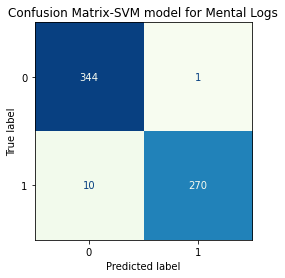

Classification Report - SVM model: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       345
           1       1.00      0.96      0.98       280

    accuracy                           0.98       625
   macro avg       0.98      0.98      0.98       625
weighted avg       0.98      0.98      0.98       625

Accuracy-SVM model for Mental Logs:  98.24000000000001 %


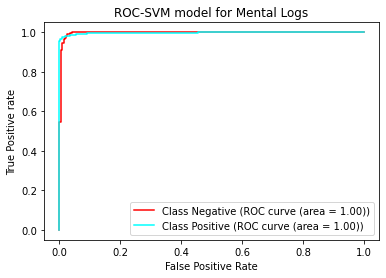

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
svclassifier = SVC(random_state=0,probability=True,kernel="rbf")
svclassifier.fit(X_train_vec, Y_train)
#Predicting the test cases
df_test_pred2 = pd.DataFrame({'actual': Y_test,
                            'predicted': svclassifier.predict(X_test_vec)})
from sklearn import metrics

cm3 = metrics.confusion_matrix(df_test_pred2.actual,
                            df_test_pred2.predicted, [0,1])
print(cm3)


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, X_test_vec, Y_test,cmap='GnBu',colorbar=False) 
plt.title("Confusion Matrix-SVM model for Mental Logs")
plt.show()
# Classification report for classifier
print("Classification Report - SVM model: \n",classification_report(Y_test, df_test_pred2.predicted))
score = metrics.accuracy_score(df_test_pred2.actual, df_test_pred2.predicted)

print("Accuracy-SVM model for Mental Logs: ", (round( float(score), 5)*100),"%")
SVM_acc=score
# Prediction probability
pred_prob = svclassifier.predict_proba(X_test_vec)
# ROC curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-SVM model for Mental Logs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC-SVM-Mental_logs',dpi=300);   

C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[[345   0]
 [107 173]]


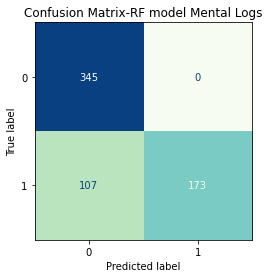

Classification Report - RF model : 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       345
           1       1.00      0.62      0.76       280

    accuracy                           0.83       625
   macro avg       0.88      0.81      0.81       625
weighted avg       0.87      0.83      0.82       625

Accuracy-RF model-Mental Logs:  82.88 %


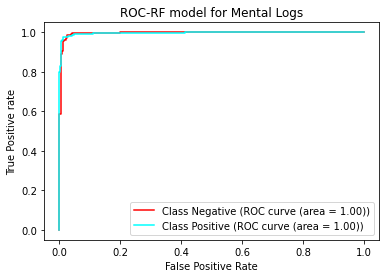

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000,max_depth=10, random_state = 42,criterion="gini")
rf.fit(X_train_vec, Y_train);
#predictions = rf.predict(X_test)
#cm = sklearn.metrics.confusion_matrix(y_test,predictions)
#print(cm)
df_test_pred1 = pd.DataFrame({'actual': Y_test,
                            'predicted': rf.predict(X_test_vec)})
from sklearn import metrics

cm2 = metrics.confusion_matrix(df_test_pred1.actual,
                            df_test_pred1.predicted, [0,1])
print(cm2)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test_vec, Y_test,cmap='GnBu',colorbar=False)
plt.title("Confusion Matrix-RF model Mental Logs")
plt.show()
# Classification report for classifier
print("Classification Report - RF model : \n",classification_report(Y_test, df_test_pred1.predicted))
score = metrics.accuracy_score(df_test_pred1.actual, df_test_pred1.predicted)

print("Accuracy-RF model-Mental Logs: ", (round( float(score), 5)*100),"%")
RFC_acc=score
# Prediction probability
pred_prob = rf.predict_proba(X_test_vec)
# ROC curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-RF model for Mental Logs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.savefig('RF-ROC-Mental_Logs',dpi=300); 

[[345   0]
 [  0 280]]


C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


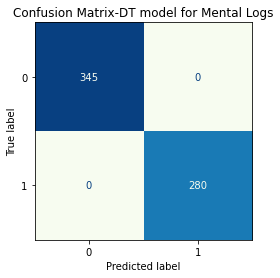

Classification Report - DT model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       280

    accuracy                           1.00       625
   macro avg       1.00      1.00      1.00       625
weighted avg       1.00      1.00      1.00       625

Accuracy-DT model for Mental Logs 100.0 %


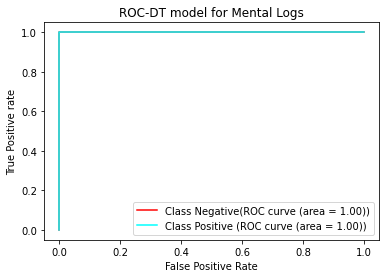

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier( random_state=0)
dt.fit(X_train_vec, Y_train)
#Predicting the test cases
df_test_pred5 = pd.DataFrame({'actual': Y_test,
                            'predicted': dt.predict(X_test_vec)})
from sklearn import metrics

cm5 = metrics.confusion_matrix(df_test_pred5.actual,
                            df_test_pred5.predicted, [0,1] )
print(cm5)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test_vec, Y_test,cmap='GnBu',colorbar=False) 
plt.title("Confusion Matrix-DT model for Mental Logs")
plt.show()
# Classification report for classifier
print("Classification Report - DT model: \n",classification_report(Y_test, df_test_pred5.predicted))
score = metrics.accuracy_score(df_test_pred5.actual, df_test_pred5.predicted )
print("Accuracy-DT model for Mental Logs", (round( float(score), 5)*100),"%")
DT_acc=score
# Prediction probability
pred_prob = dt.predict_proba(X_test_vec)
# ROC curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative(ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-DT model for Mental Logs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('DT-ROC-Mental_Logs',dpi=300);    

[[334  11]
 [155 125]]


C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


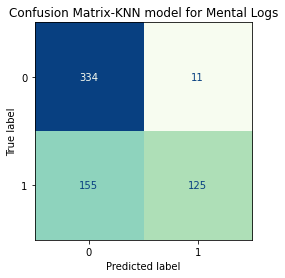

Classification Report-KNN model: 
               precision    recall  f1-score   support

           0       0.68      0.97      0.80       345
           1       0.92      0.45      0.60       280

    accuracy                           0.73       625
   macro avg       0.80      0.71      0.70       625
weighted avg       0.79      0.73      0.71       625

Accuracy-KNN model for Mental Logs  73.44000000000001 %


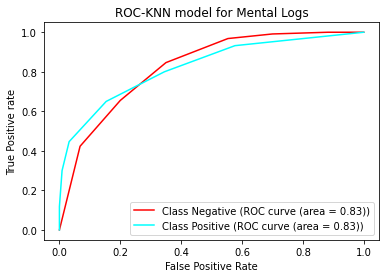

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_vec, Y_train)

#Predicting the test cases
df_test_pred6 = pd.DataFrame({'actual': Y_test,
                           'predicted': knn.predict(X_test_vec)})

from sklearn import metrics

cm6 = metrics.confusion_matrix(df_test_pred6.actual,
                          df_test_pred6.predicted, [0,1] )
print(cm6)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_vec, Y_test,cmap='GnBu',colorbar=False) 
plt.title("Confusion Matrix-KNN model for Mental Logs")
plt.show()
#Classification report for classifier
print("Classification Report-KNN model: \n",classification_report(Y_test, df_test_pred6.predicted))
score = metrics.accuracy_score(df_test_pred6.actual, df_test_pred6.predicted )
print("Accuracy-KNN model for Mental Logs ", (round( float(score), 4)*100),"%")
KNN_acc=score
# ROC curve for classes
pred_prob = knn.predict_proba(X_test_vec)
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-KNN model for Mental Logs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('KNN-ROC-Mental_Logs',dpi=300); 

[[337   8]
 [ 21 259]]


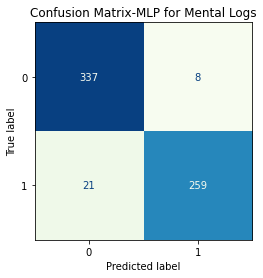

Classification Report-MLP model: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       345
           1       0.97      0.93      0.95       280

    accuracy                           0.95       625
   macro avg       0.96      0.95      0.95       625
weighted avg       0.95      0.95      0.95       625

Accuracy-MLP model for Mental Logs:  95.36 %


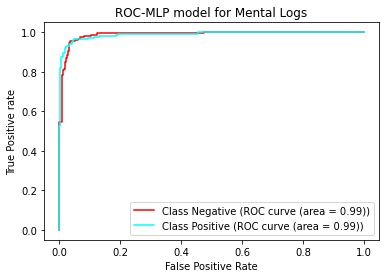

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_vec,Y_train)

predict_train = mlp.predict(X_train_vec)
predict_test = mlp.predict(X_test_vec)
mlp.fit(X_train_vec, Y_train)
mlp.predict_proba(X_test_vec)
mlp.predict(X_test_vec)
mlp.score(X_train_vec, Y_train)
#confusion_matrix(y_test, mlp.predict(X_test))
cm10 = confusion_matrix(Y_test, mlp.predict(X_test_vec))
print(cm10)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test_vec, Y_test,cmap='GnBu',colorbar=False)
plt.title("Confusion Matrix-MLP for Mental Logs")
plt.show()
df_test_pred8 = pd.DataFrame({'actual': Y_test,
                           'predicted': mlp.predict(X_test_vec)})

from sklearn import metrics

#cm7 = metrics.confusion_matrix(df_test_pred8.actual,
  #                        df_test_pred8.predicted, [3,2,1,0] )
#cm7
#Classification report for classifier
print("Classification Report-MLP model: \n",classification_report(Y_test, df_test_pred8.predicted))
score = metrics.accuracy_score(df_test_pred8.actual, df_test_pred8.predicted )
print("Accuracy-MLP model for Mental Logs: ", (round( float(score), 4)*100),"%")
mlp_acc=score
# ROC curve for classes
pred_prob = mlp.predict_proba(X_test_vec)
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-MLP model for Mental Logs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('MLP-ROC-Mental Logs',dpi=300); 

[[315  30]
 [  3 277]]


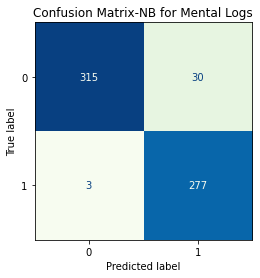

Classification Report-NB model: 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       345
           1       0.90      0.99      0.94       280

    accuracy                           0.95       625
   macro avg       0.95      0.95      0.95       625
weighted avg       0.95      0.95      0.95       625

Accuracy-NB model for Mental Logs:  94.72 %


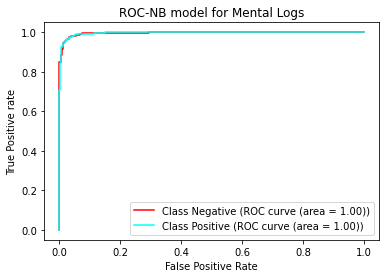

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, Y_train)
#MultinomialNB()
#model.score(X_test_vec, Y_test)
predict_train = model.predict(X_train_vec)
predict_test = model.predict(X_test_vec)
model.fit(X_train_vec, Y_train)
model.predict_proba(X_test_vec)
model.predict(X_test_vec)
model.score(X_train_vec, Y_train)
#confusion_matrix(y_test, mlp.predict(X_test))
cm10 = confusion_matrix(Y_test, model.predict(X_test_vec))
print(cm10)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_vec, Y_test,cmap='GnBu',colorbar=False)
plt.title("Confusion Matrix-NB for Mental Logs")
plt.show()
df_test_pred8 = pd.DataFrame({'actual': Y_test,
                           'predicted': model.predict(X_test_vec)})

from sklearn import metrics

#cm7 = metrics.confusion_matrix(df_test_pred8.actual,
  #                        df_test_pred8.predicted, [3,2,1,0] )
#cm7
#Classification report for classifier
print("Classification Report-NB model: \n",classification_report(Y_test, df_test_pred8.predicted))
score = metrics.accuracy_score(df_test_pred8.actual, df_test_pred8.predicted )
print("Accuracy-NB model for Mental Logs: ", (round( float(score), 4)*100),"%")
NB_acc=score
# ROC curve for classes
pred_prob = model.predict_proba(X_test_vec)
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-NB model for Mental Logs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('NB-ROC-Mental_Logs',dpi=300); 

[[344   1]
 [  7 273]]


C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


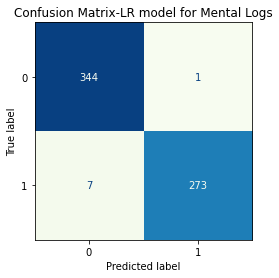

Classification Report - LR model: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       345
           1       1.00      0.97      0.99       280

    accuracy                           0.99       625
   macro avg       0.99      0.99      0.99       625
weighted avg       0.99      0.99      0.99       625

Accuracy-LR model for Mental Logs:  98.72 %


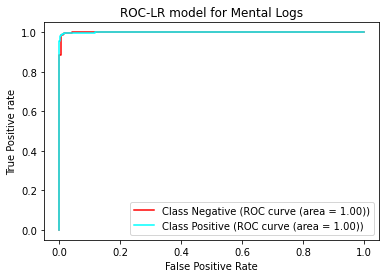

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
k = 10
model = LogisticRegression(solver= 'liblinear')
model.fit(X_train_vec, Y_train)
#Predicting the test cases
df_test_pred2 = pd.DataFrame({'actual': Y_test,
                            'predicted': model.predict(X_test_vec)})
from sklearn import metrics

cm3 = metrics.confusion_matrix(df_test_pred2.actual,
                            df_test_pred2.predicted, [0,1])
print(cm3)


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_vec, Y_test,cmap='GnBu',colorbar=False) 
plt.title("Confusion Matrix-LR model for Mental Logs")
plt.show()
# Classification report for classifier
print("Classification Report - LR model: \n",classification_report(Y_test, df_test_pred2.predicted))
score = metrics.accuracy_score(df_test_pred2.actual, df_test_pred2.predicted)

print("Accuracy-LR model for Mental Logs: ", (round( float(score), 5)*100),"%")
SVM_acc=score
# Prediction probability
pred_prob = model.predict_proba(X_test_vec)
# ROC curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-LR model for Mental Logs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC-LR-Mental_logs',dpi=300);   

In [ ]:
PD-BOW - Twitter Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import operator
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import re
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION,p.OPT.RESERVED)
import ftfy
import seaborn as sns

import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('Dataset_Mental_non_mental.csv')
df.head(500)

,Logs,Status
0,""" "" �??ɝ��?�ɝ?�?? �??ɝ?�?? �??ɝ? �??�?�ɝ��??ɝ?...",1
1,"""@Bipolar_BaBa: I love it when people try to h...",1
2,"""�?��?? �?��??�?�ɝ��??ɝ��?��??ɝ?�?��??, �??ɝ?�...",1
3,"""Be the CHANGE you want to see in the world"" \...",0
4,"""Be the CHANGE you want to see in the world"" \...",0
...,...,...
495,@bhaleraosarang Fun facts:\n\n1.Raina is a hum...,0
496,@bharat_2214 ɿ?ɖ?ɿ?ɿ�ɿ?ɿ� depression?,1
497,@BharatBiotech @SuchitraElla @ICMRDELHI @MoHFW...,1
498,@BharatW77129048 @AudreyTruschke There is noth...,1


In [ ]:
df["Status"].value_counts()

0    1630
1    1519
Name: Status, dtype: int64

In [ ]:
def cleanHtml(Logs):
    cleanreg = re.compile('<.*?>')
    cleantxt = re.sub(cleanreg, ' ', Logs)
    return cleantxt
df['Logs'] = df['Logs'].apply(cleanHtml)
df.head()

,Logs,Status
0,""" "" �??ɝ��?�ɝ?�?? �??ɝ?�?? �??ɝ? �??�?�ɝ��??ɝ?...",1
1,"""@Bipolar_BaBa: I love it when people try to h...",1
2,"""�?��?? �?��??�?�ɝ��??ɝ��?��??ɝ?�?��??, �??ɝ?�...",1
3,"""Be the CHANGE you want to see in the world"" \...",0
4,"""Be the CHANGE you want to see in the world"" \...",0


In [ ]:
stop = set(stopwords.words("english"))
df['Logs'] = df['Logs'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)

                                                   Logs  Status
0     " " �??ɝ��?�ɝ?�?? �??ɝ?�?? �??ɝ? �??�?�ɝ��??ɝ?...       1
1     "@Bipolar_BaBa: I love people try hurt feeling...       1
2     "�?��?? �?��??�?�ɝ��??ɝ��?��??ɝ?�?��??, �??ɝ?�...       1
3     "Be CHANGE want see world" - Mahatma Gandhi #t...       0
4     "Be CHANGE want see world" - Mahatma Gandhi #t...       0
...                                                 ...     ...
3144  Your life life. You deal joys trauma yourself....       1
3145          You're literally living life people love!       0
3146  Youth Mental Health Day2021 �?? We aim remove ...       1
3147  Yrr guys Mai 1k subscriber ke bahut hi pass hu...       0
3148  Zafaryab Jilani, Advocate Sunni Waqf Board rep...       1

[3149 rows x 2 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.Logs, df.Status, test_size = 0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(X_train_vec)
print(X_test_vec)


  (0, 4377)	1
  (0, 10778)	1
  (0, 11504)	1
  (0, 7930)	1
  (0, 7237)	1
  (0, 5487)	1
  (0, 10151)	1
  (0, 590)	1
  (0, 589)	1
  (0, 10481)	1
  (0, 7144)	1
  (0, 11591)	1
  (0, 7478)	1
  (0, 4244)	1
  (0, 8196)	1
  (0, 5864)	1
  (0, 2538)	1
  (0, 9584)	1
  (0, 9308)	1
  (0, 1982)	1
  (0, 9345)	1
  (0, 1097)	1
  (0, 2075)	1
  (0, 7238)	1
  (0, 10152)	1
  :	:
  (2358, 5529)	1
  (2358, 8525)	1
  (2358, 4274)	1
  (2358, 4452)	1
  (2358, 7799)	1
  (2358, 5372)	1
  (2359, 12257)	1
  (2359, 7775)	1
  (2359, 2601)	1
  (2359, 7490)	1
  (2359, 2696)	1
  (2359, 2921)	1
  (2359, 8075)	1
  (2359, 10761)	1
  (2359, 9524)	1
  (2359, 9454)	1
  (2359, 1035)	1
  (2359, 5056)	1
  (2359, 5722)	1
  (2359, 12536)	1
  (2360, 6808)	1
  (2360, 12317)	1
  (2360, 8391)	1
  (2360, 478)	1
  (2360, 4809)	1
  (0, 4055)	1
  (0, 4215)	1
  (0, 8084)	1
  (1, 1881)	1
  (1, 1929)	1
  (1, 4783)	1
  (1, 5009)	1
  (1, 7044)	1
  (2, 1937)	1
  (2, 3051)	1
  (2, 3807)	1
  (2, 3973)	1
  (2, 4055)	1
  (2, 4572)	1
  (2, 4881)	1
  

C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[[382  18]
 [ 29 359]]


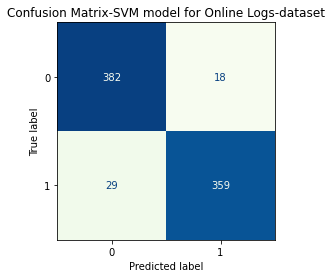

Classification Report - SVM model for online Logs-dataset: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       400
           1       0.95      0.93      0.94       388

    accuracy                           0.94       788
   macro avg       0.94      0.94      0.94       788
weighted avg       0.94      0.94      0.94       788

Accuracy-SVM model for online Logs-dataset:  94.036 %


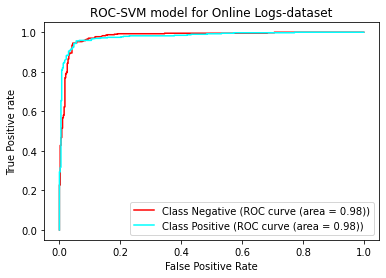

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
svclassifier = SVC(random_state=0,probability=True,kernel="rbf")
svclassifier.fit(X_train_vec, Y_train)
#Predicting the test cases
df_test_pred2 = pd.DataFrame({'actual': Y_test,
                            'predicted': svclassifier.predict(X_test_vec)})
from sklearn import metrics

cm3 = metrics.confusion_matrix(df_test_pred2.actual,
                            df_test_pred2.predicted, [0,1])
print(cm3)


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, X_test_vec, Y_test,cmap='GnBu',colorbar=False) 
plt.title("Confusion Matrix-SVM model for Online Logs-dataset")
plt.show()
# Classification report for classifier
print("Classification Report - SVM model for online Logs-dataset: \n",classification_report(Y_test, df_test_pred2.predicted))
score = metrics.accuracy_score(df_test_pred2.actual, df_test_pred2.predicted)

print("Accuracy-SVM model for online Logs-dataset: ", (round( float(score), 5)*100),"%")
SVM_acc=score
# Prediction probability
pred_prob = svclassifier.predict_proba(X_test_vec)
# ROC curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
plt.title('ROC-SVM model for Online Logs-dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC-SVM-Mental_Comaprison_logs',dpi=300);   

C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[[396   4]
 [ 86 302]]


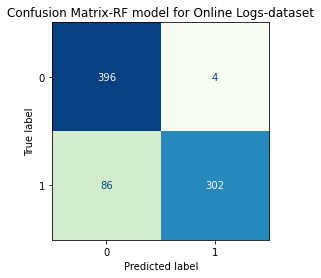

Classification Report - RF model for Online Logs-dataset: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       400
           1       0.99      0.78      0.87       388

    accuracy                           0.89       788
   macro avg       0.90      0.88      0.88       788
weighted avg       0.90      0.89      0.88       788

Accuracy-RF model for Online Logs-dataset:  88.579 %


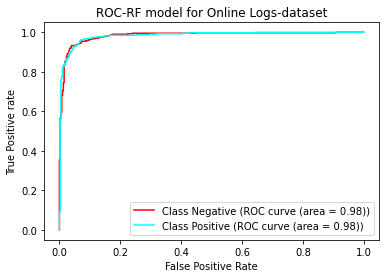

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000,max_depth=10, random_state = 42,criterion="gini")
rf.fit(X_train_vec, Y_train);
#predictions = rf.predict(X_test)
#cm = sklearn.metrics.confusion_matrix(y_test,predictions)
#print(cm)
df_test_pred1 = pd.DataFrame({'actual': Y_test,
                            'predicted': rf.predict(X_test_vec)})
from sklearn import metrics

cm2 = metrics.confusion_matrix(df_test_pred1.actual,
                            df_test_pred1.predicted, [0,1])
print(cm2)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test_vec, Y_test,cmap='GnBu',colorbar=False)
plt.title("Confusion Matrix-RF model for Online Logs-dataset")
plt.show()
# Classification report for classifier
print("Classification Report - RF model for Online Logs-dataset: \n",classification_report(Y_test, df_test_pred1.predicted))
score = metrics.accuracy_score(df_test_pred1.actual, df_test_pred1.predicted)

print("Accuracy-RF model for Online Logs-dataset: ", (round( float(score), 5)*100),"%")
RFC_acc=score
# Prediction probability
pred_prob = rf.predict_proba(X_test_vec)
# ROC curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
plt.title('ROC-RF model for Online Logs-dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.savefig('RF-ROC-Comparison_Logs',dpi=300); 

[[383  17]
 [ 18 370]]


C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


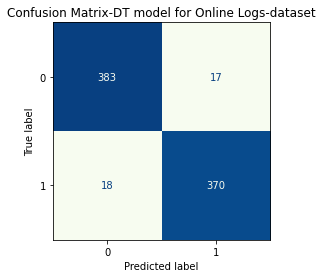

Classification Report - DT model for Online Logs-dataset: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       400
           1       0.96      0.95      0.95       388

    accuracy                           0.96       788
   macro avg       0.96      0.96      0.96       788
weighted avg       0.96      0.96      0.96       788

Accuracy-DT model for Online Logs-dataset 95.55799999999999 %


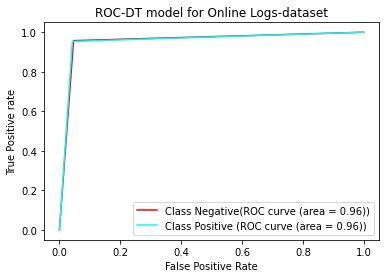

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier( random_state=0)
dt.fit(X_train_vec, Y_train)
#Predicting the test cases
df_test_pred5 = pd.DataFrame({'actual': Y_test,
                            'predicted': dt.predict(X_test_vec)})
from sklearn import metrics

cm5 = metrics.confusion_matrix(df_test_pred5.actual,
                            df_test_pred5.predicted, [0,1] )
print(cm5)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test_vec, Y_test,cmap='GnBu',colorbar=False) 
plt.title("Confusion Matrix-DT model for Online Logs-dataset")
plt.show()
# Classification report for classifier
print("Classification Report - DT model for Online Logs-dataset: \n",classification_report(Y_test, df_test_pred5.predicted))
score = metrics.accuracy_score(df_test_pred5.actual, df_test_pred5.predicted )
print("Accuracy-DT model for Online Logs-dataset", (round( float(score), 5)*100),"%")
DT_acc=score
# Prediction probability
pred_prob = dt.predict_proba(X_test_vec)
# ROC curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative(ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
plt.title('ROC-DT model for Online Logs-dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('DT-ROC-Mental_Comparison_Logs',dpi=300);    

[[319  81]
 [137 251]]


C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


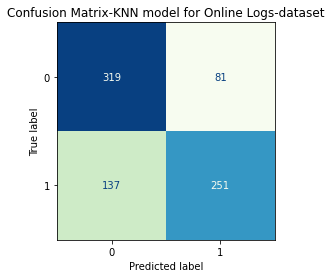

Classification Report-KNN model for Online Logs-dataset: 
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       400
           1       0.76      0.65      0.70       388

    accuracy                           0.72       788
   macro avg       0.73      0.72      0.72       788
weighted avg       0.73      0.72      0.72       788

Accuracy-KNN model for Online Logs-dataset 72.34 %


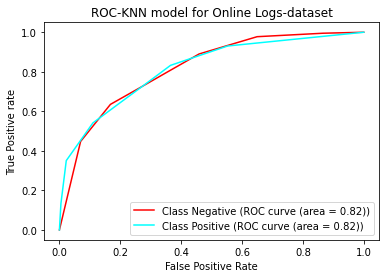

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_vec, Y_train)

#Predicting the test cases
df_test_pred6 = pd.DataFrame({'actual': Y_test,
                           'predicted': knn.predict(X_test_vec)})

from sklearn import metrics

cm6 = metrics.confusion_matrix(df_test_pred6.actual,
                          df_test_pred6.predicted, [0,1] )
print(cm6)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_vec, Y_test,cmap='GnBu',colorbar=False) 
plt.title("Confusion Matrix-KNN model for Online Logs-dataset")
plt.show()
#Classification report for classifier
print("Classification Report-KNN model for Online Logs-dataset: \n",classification_report(Y_test, df_test_pred6.predicted))
score = metrics.accuracy_score(df_test_pred6.actual, df_test_pred6.predicted )
print("Accuracy-KNN model for Online Logs-dataset", (round( float(score), 4)*100),"%")
KNN_acc=score
# ROC curve for classes
pred_prob = knn.predict_proba(X_test_vec)
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
plt.title('ROC-KNN model for Online Logs-dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('KNN-ROC-Mental_Comparison_Logs',dpi=300); 

[[363  37]
 [ 36 352]]


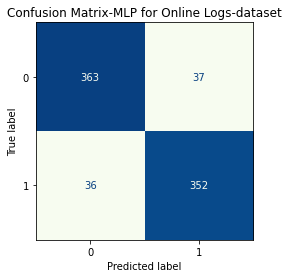

Classification Report-MLP modelfor Online Logs-dataset : 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       400
           1       0.90      0.91      0.91       388

    accuracy                           0.91       788
   macro avg       0.91      0.91      0.91       788
weighted avg       0.91      0.91      0.91       788

Accuracy-MLP model for Online Logs-dataset:  90.74 %


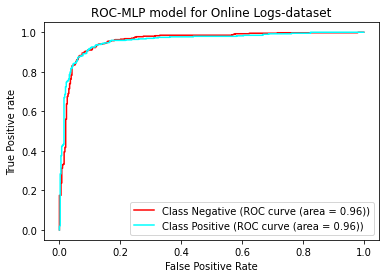

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_vec,Y_train)

predict_train = mlp.predict(X_train_vec)
predict_test = mlp.predict(X_test_vec)
mlp.fit(X_train_vec, Y_train)
mlp.predict_proba(X_test_vec)
mlp.predict(X_test_vec)
mlp.score(X_train_vec, Y_train)
#confusion_matrix(y_test, mlp.predict(X_test))
cm10 = confusion_matrix(Y_test, mlp.predict(X_test_vec))
print(cm10)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test_vec, Y_test,cmap='GnBu',colorbar=False)
plt.title("Confusion Matrix-MLP for Online Logs-dataset")
plt.show()
df_test_pred8 = pd.DataFrame({'actual': Y_test,
                           'predicted': mlp.predict(X_test_vec)})

from sklearn import metrics

#cm7 = metrics.confusion_matrix(df_test_pred8.actual,
  #                        df_test_pred8.predicted, [3,2,1,0] )
#cm7
#Classification report for classifier
print("Classification Report-MLP modelfor Online Logs-dataset : \n",classification_report(Y_test, df_test_pred8.predicted))
score = metrics.accuracy_score(df_test_pred8.actual, df_test_pred8.predicted )
print("Accuracy-MLP model for Online Logs-dataset: ", (round( float(score), 4)*100),"%")
mlp_acc=score
# ROC curve for classes
pred_prob = mlp.predict_proba(X_test_vec)
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
plt.title('ROC-MLP model for Online Logs-dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('MLP-ROC-Mental-Comparison-Logs',dpi=300); 

[[349  51]
 [ 33 355]]


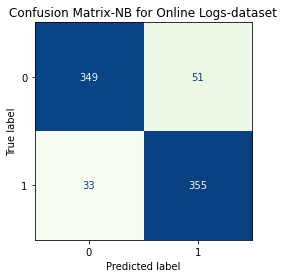

Classification Report-NB modelfor Online Logs-dataset : 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       400
           1       0.87      0.91      0.89       388

    accuracy                           0.89       788
   macro avg       0.89      0.89      0.89       788
weighted avg       0.89      0.89      0.89       788

Accuracy-NB model for Online Logs-dataset:  89.34 %


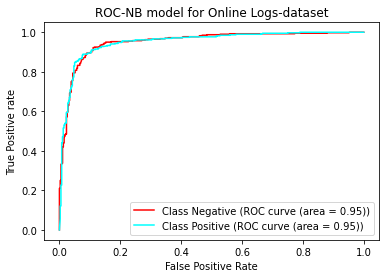

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, Y_train)
#MultinomialNB()
#model.score(X_test_vec, Y_test)
predict_train = model.predict(X_train_vec)
predict_test = model.predict(X_test_vec)
model.fit(X_train_vec, Y_train)
model.predict_proba(X_test_vec)
model.predict(X_test_vec)
model.score(X_train_vec, Y_train)
#confusion_matrix(y_test, mlp.predict(X_test))
cm10 = confusion_matrix(Y_test, model.predict(X_test_vec))
print(cm10)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_vec, Y_test,cmap='GnBu',colorbar=False)
plt.title("Confusion Matrix-NB for Online Logs-dataset")
plt.show()
df_test_pred8 = pd.DataFrame({'actual': Y_test,
                           'predicted': model.predict(X_test_vec)})

from sklearn import metrics

#cm7 = metrics.confusion_matrix(df_test_pred8.actual,
  #                        df_test_pred8.predicted, [3,2,1,0] )
#cm7
#Classification report for classifier
print("Classification Report-NB modelfor Online Logs-dataset : \n",classification_report(Y_test, df_test_pred8.predicted))
score = metrics.accuracy_score(df_test_pred8.actual, df_test_pred8.predicted )
print("Accuracy-NB model for Online Logs-dataset: ", (round( float(score), 4)*100),"%")
NB_acc=score
# ROC curve for classes
pred_prob = model.predict_proba(X_test_vec)
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-NB model for Online Logs-dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('NB-ROC-Mental_Comparison_Logs',dpi=300); 

[[386  14]
 [ 24 364]]


C:\Users\anju\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


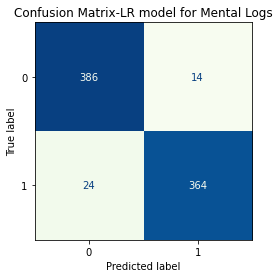

Classification Report - LR model: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       400
           1       0.96      0.94      0.95       388

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788

Accuracy-LR model for Mental Logs:  95.178 %


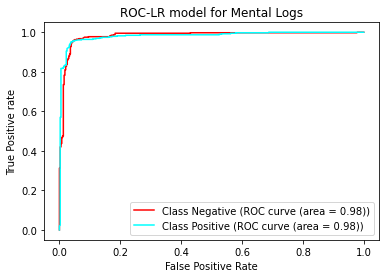

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
k = 10
model = LogisticRegression(solver= 'liblinear')
model.fit(X_train_vec, Y_train)
#Predicting the test cases
df_test_pred2 = pd.DataFrame({'actual': Y_test,
                            'predicted': model.predict(X_test_vec)})
from sklearn import metrics

cm3 = metrics.confusion_matrix(df_test_pred2.actual,
                            df_test_pred2.predicted, [0,1])
print(cm3)


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_vec, Y_test,cmap='GnBu',colorbar=False) 
plt.title("Confusion Matrix-LR model for Mental Logs")
plt.show()
# Classification report for classifier
print("Classification Report - LR model: \n",classification_report(Y_test, df_test_pred2.predicted))
score = metrics.accuracy_score(df_test_pred2.actual, df_test_pred2.predicted)

print("Accuracy-LR model for Mental Logs: ", (round( float(score), 5)*100),"%")
SVM_acc=score
# Prediction probability
pred_prob = model.predict_proba(X_test_vec)
# ROC curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='-',color='red', label='Class Negative (ROC curve (area = %0.2f))' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='aqua', label='Class Positive (ROC curve (area = %0.2f))' % roc_auc[1])
#plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class Moderate (ROC curve (area = %0.2f))' % roc_auc[2])
#plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='Class Severe (ROC curve (area = %0.2f))' % roc_auc[3])
#plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='Class 4 vs Rest')
plt.title('ROC-LR model for Mental Logs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC-LR-Mental_logs',dpi=300);   

In [ ]:
# Our dataset Cloud

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:

df = pd.read_csv("Ourdataset_20.6.2022.csv", encoding= 'unicode_escape')

In [ ]:


#shape of the dataframe
print('The shape of the dataframe is :',df.shape)

#first few records
df.head()

The shape of the dataframe is : (2500, 1)


,Logs
0,My life is beautiful????\n#?????????«??­...
1,"@3dLooks I have ADD,ADHD,depression disorder,b..."
2,Life is beautiful without exams.????????
3,No I enjoy waking up and spending time with th...
4,We are Live NOW on YouTube with our #HarryPott...


In [ ]:
df['Logs'].isnull().sum()

0

In [ ]:
Distress=df
Distress['Logs']= Distress['Logs'].str.lower()
Distress['Logs'].head()


0    my life is beautiful????\n#?????????«??­...
1    @3dlooks i have add,adhd,depression disorder,b...
2        life is beautiful without exams.????????
3    no i enjoy waking up and spending time with th...
4    we are live now on youtube with our #harrypott...
Name: Logs, dtype: object

In [ ]:
all_Distress = Distress['Logs'].str.split(' ')
all_Distress.head()

0    [my, life, is, beautiful????\n#?????????«...
1    [@3dlooks, i, have, add,adhd,depression, disor...
2    [life, is, beautiful, without, exams.?????...
3    [no, i, enjoy, waking, up, and, spending, time...
4    [we, are, live, now, on, youtube, with, our, #...
Name: Logs, dtype: object

In [ ]:
all_Distress_cleaned = []

for text in all_Distress:
    text = [x.strip(string.punctuation) for x in text]
    all_Distress_cleaned.append(text)

all_Distress_cleaned[0]

text_Distress= [" ".join(text) for text in all_Distress_cleaned]
final_text_Distress = " ".join(text_Distress)
final_text_Distress[:500]

"my life is beautiful?\x9b\x8f???\n#????\x83?\x9b????\x8f«??\x8f\xad\x8fÿ \x83?\x9b????\x8f«?\x9c\x92?\x83?\x9b?\x9c\x83?????\x9c\x92 https://t.co/c9hpygxvmq 3dlooks i have add,adhd,depression disorder,bad anxiety,bipolar disorder \n\ni was diagnosed with all of these and it sucks cuz i never know which ones making feel the way i am but i can say im proud of myself couple years ago i didnt think i'd even still life is beautiful without exams.?\x9b\x83?\x9b?\x9d?????\x8f no i enjoy waking up and spending time with the one that i love one-on-one personal individual time s"

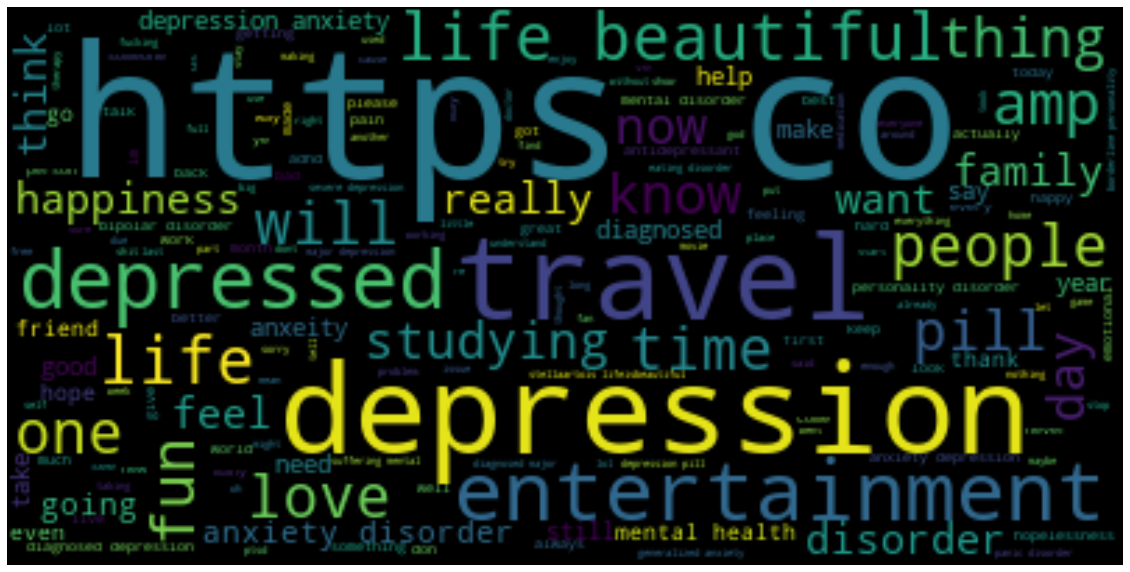

In [ ]:
wordcloud_Distress = WordCloud(background_color="black").generate(final_text_Distress)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_Distress, interpolation='bilinear')
plt.axis("off")
plt.show()

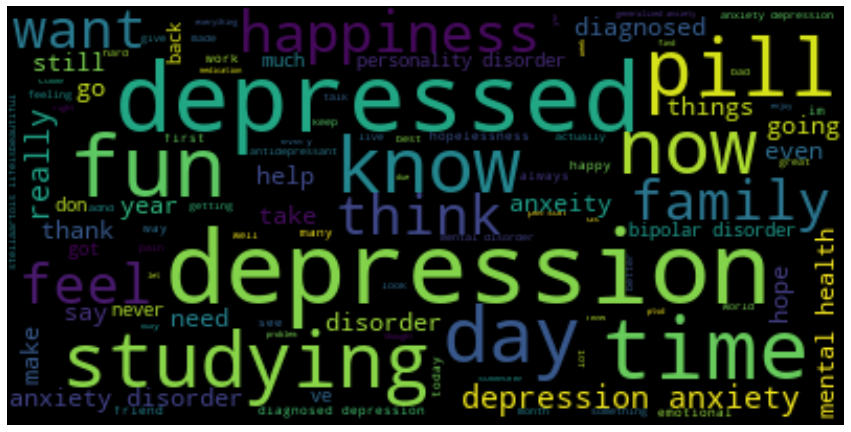

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["one","people","life","life","thing","beautiful","entertainment","travel","https","love","co","_é","ki","narendramodi", "rampal", "ji", "sir","maharaj","amp","please","_e","india","loved","will","good"])

wordcloud_Distress = WordCloud(stopwords=stopwords, background_color="black", max_font_size=50, max_words=100).generate(final_text_Distress)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_Distress, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Twitter Dataset Cloud

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:

df = pd.read_csv("Twitter_Dataset_20.6.2022.csv", encoding= 'unicode_escape')

In [ ]:


#shape of the dataframe
print('The shape of the dataframe is :',df.shape)

#first few records
df.head()

The shape of the dataframe is : (3149, 1)


,Logs
0,""" "" É??ÉÉ?¿É?É?? É??É?É?? É??É? É??É?»É..."
1,"""@Bipolar_BaBa: I love it when people try to h..."
2,"""É?É?? É?¿É??É?ÉÉ??ÉÉ?¿É??É?É?¾É??, É??..."
3,"""Be the CHANGE you want to see in the world"" \..."
4,"""Be the CHANGE you want to see in the world"" \..."


In [ ]:
df['Logs'].isnull().sum()

0

In [ ]:
Distress=df
Distress['Logs']= Distress['Logs'].str.lower()
Distress['Logs'].head()


0    " " é??éé?¿é?é?? é??é?é?? é??é? é??é?»é...
1    "@bipolar_baba: i love it when people try to h...
2    "é?é?? é?¿é??é?éé??éé?¿é??é?é?¾é??, é??...
3    "be the change you want to see in the world" \...
4    "be the change you want to see in the world" \...
Name: Logs, dtype: object

In [ ]:
all_Distress = Distress['Logs'].str.split(' ')
all_Distress.head()

0    [", ", é??éé?¿é?é??, é??é?é??, é??é?, é??...
1    ["@bipolar_baba:, i, love, it, when, people, t...
2    ["é?é??, é?¿é??é?éé??éé?¿é??é?é?¾é??,, ...
3    ["be, the, change, you, want, to, see, in, the...
4    ["be, the, change, you, want, to, see, in, the...
Name: Logs, dtype: object

In [ ]:
all_Distress_cleaned = []

for text in all_Distress:
    text = [x.strip(string.punctuation) for x in text]
    all_Distress_cleaned.append(text)

all_Distress_cleaned[0]

text_Distress= [" ".join(text) for text in all_Distress_cleaned]
final_text_Distress = " ".join(text_Distress)
final_text_Distress[:]

'  é??é\x9d\x8dé?¿é\x9d?é é??é\x9d?é é??é\x9d é??é?»é\x9d\x8dé??é\x9d?é é??é é??é\x9d\x81é??é??é?¾ é?\x90é??é é??é\x9d?é??é é??é??é??é?¬é?\x8f é??é?¬ é??é \né??é?» é??é?âé\x9d\x81é??é\x9d\x8dé??é é??é??é?¿é\x9d?é é??é\x9d é??é\x9d\x81é é??é\x9d é??é??é?¿é\x9d?é é??é\x9d?é é??é?¿é\x9d\x8dé??é?¬é??é??é é??é é??é\x9d?é??é é??é??é?âé\x9d   ù?\né\x9d?é\x9d  é??é é??é\x9d\x8dé?¿é\x9d é??é\x9dùé?\x9cé\x9d\x8dé?ïé é\x9d?é\x9d????????\x8f??\x8fø????\n  in anger the choice of words should be such that tomorrow \nwhen the anger is over do not be ashamed of yourself   https://t.co/puev7xwdnn bipolar_baba i love it when people try to hurt my feelings because i donä??t have any é?\x8fé é?¿é??é?\x9cé\x9d\x8dé??é\x9d\x8dé?¿é??é\x9d?é?¾é é??é\x9d?é??é?¿é\x9d é?¿é??é?\x9cé\x9d\x8dé??é\x9d\x8dé?¿é??é\x9d?é?¾é??é\x9d?é é??é\x9d é??é??é?\x9d"\n\nhonä??ble union home minister shri amitshah ji met the injured police personnel at sushruta trauma centre civil lines delhi \n\n#salute2delhipolice https://t.co/ur

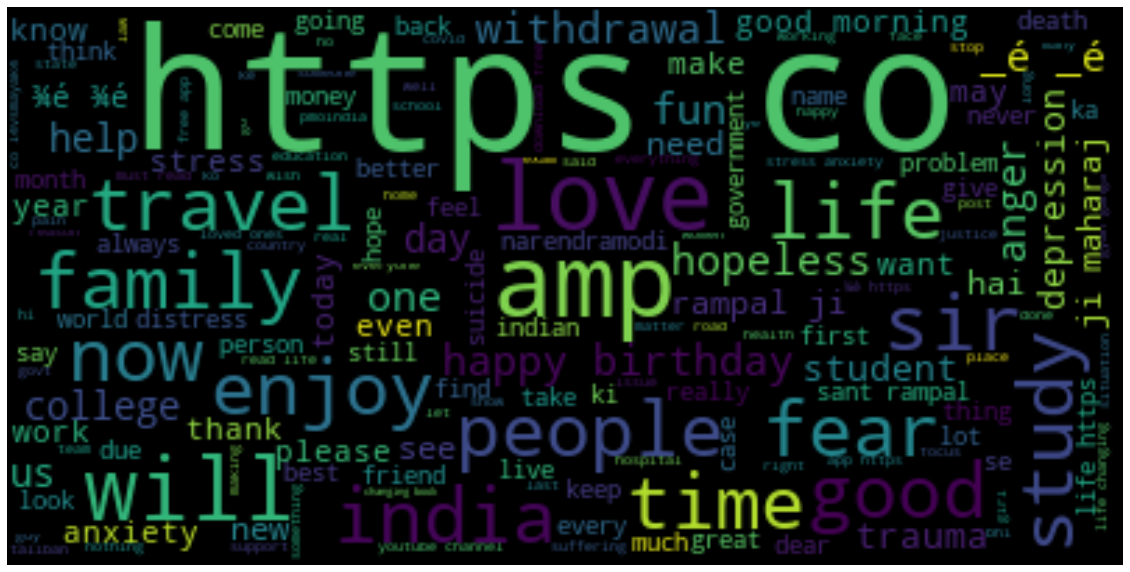

In [ ]:
wordcloud_Distress = WordCloud(background_color="black").generate(final_text_Distress)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_Distress, interpolation='bilinear')
plt.axis("off")
plt.show()

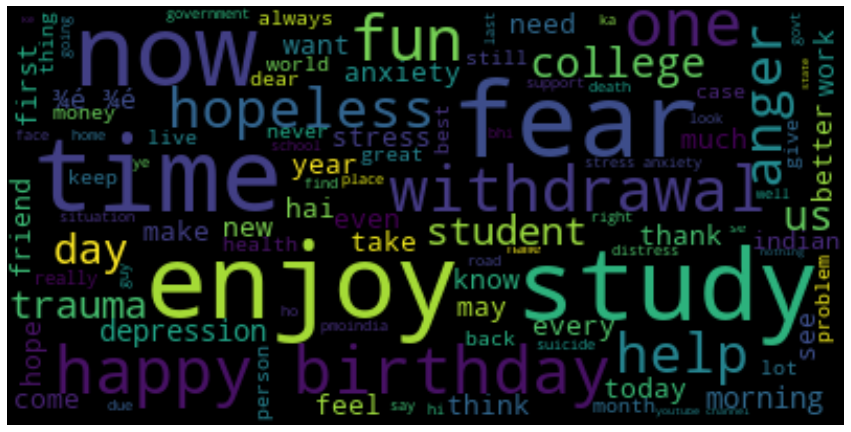

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["people","family","life","travel","3⁄4è","https","love","co","_é","ki","narendramodi", "rampal", "ji", "sir","maharaj","amp","please","_e","india","loved","will","good"])

wordcloud_Distress = WordCloud(stopwords=stopwords, background_color="black", max_font_size=50, max_words=100).generate(final_text_Distress)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_Distress, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# 10 Fold validation of our dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import operator
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import re
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION,p.OPT.RESERVED)
import ftfy
import seaborn as sns

import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('Logs_data_csv_30.8.2021.csv')
df.head(200)

,Logs,Status
0,My life is beautiful?��???\n#????�?�????��??��...,0
1,"@3dLooks I have ADD,ADHD,depression disorder,b...",1
2,Life is beautiful without exams.?��?�?�?????�,0
3,No I enjoy waking up and spending time with th...,0
4,We are Live NOW on YouTube with our #HarryPott...,0
...,...,...
195,@ANDIBABY8 @KingsleyBates Micro dose magic mus...,1
196,@cassunzels @hella_leigh I have dealt with cri...,1
197,Went off the pill 6 weeks ago after constant s...,1
198,"mairumatwt: i love mairuma, it's so wholesome,...",1


In [ ]:
df["Status"].value_counts()

0    1438
1    1062
Name: Status, dtype: int64

In [ ]:
def cleanHtml(Logs):
    cleanreg = re.compile('<.*?>')
    cleantxt = re.sub(cleanreg, ' ', Logs)
    return cleantxt
df['Logs'] = df['Logs'].apply(cleanHtml)
df.head()

,Logs,Status
0,My life is beautiful?��???\n#????�?�????��??��...,0
1,"@3dLooks I have ADD,ADHD,depression disorder,b...",1
2,Life is beautiful without exams.?��?�?�?????�,0
3,No I enjoy waking up and spending time with th...,0
4,We are Live NOW on YouTube with our #HarryPott...,0


In [ ]:
stop = set(stopwords.words("english"))
df['Logs'] = df['Logs'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)

                                                   Logs  Status
0     My life beautiful?��??? #????�?�????��??���� #...       0
1     @3dLooks I ADD,ADHD,depression disorder,bad an...       1
2            Life beautiful without exams.?��?�?�?????�       0
3     No I enjoy waking spending time one I love one...       0
4     We Live NOW YouTube #HarryPotter themed - Virt...       0
...                                                 ...     ...
2495   #Hiking # Going world tour # Mountains # Beaches       0
2496  How Live #Entertainment Can Increase Your Rest...       0
2497  like remembered ending life beautiful cant sto...       0
2498                @ESCAPADEVIBEZ Don't life beautiful       0
2499  I 28, diagnosed ADHD, anxiety/depression, lear...       1

[2500 rows x 2 columns]


In [ ]:

X = df.drop(['Status'], axis =1) 
y = df['Status']
print(X)
print(y)


                                                   Logs
0     My life beautiful?��??? #????�?�????��??���� #...
1     @3dLooks I ADD,ADHD,depression disorder,bad an...
2            Life beautiful without exams.?��?�?�?????�
3     No I enjoy waking spending time one I love one...
4     We Live NOW YouTube #HarryPotter themed - Virt...
...                                                 ...
2495   #Hiking # Going world tour # Mountains # Beaches
2496  How Live #Entertainment Can Increase Your Rest...
2497  like remembered ending life beautiful cant sto...
2498                @ESCAPADEVIBEZ Don't life beautiful
2499  I 28, diagnosed ADHD, anxiety/depression, lear...

[2500 rows x 1 columns]
0       0
1       1
2       0
3       0
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    1
Name: Status, Length: 2500, dtype: int64


In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True)
X_vec = vectorizer.fit_transform(X)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import re

import pickle
from tqdm import tqdm
import os
from scipy.sparse import hstack
from collections import Counter

In [ ]:
vect_essay_tfidf = TfidfVectorizer(min_df=10)
vect_essay_tfidf.fit(df['Logs'].values)
X_train_essay_tfidf = vect_essay_tfidf.transform(df['Logs'].values)

In [ ]:
X_train_essay_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df1 = pd.DataFrame(X_train_essay_tfidf.toarray(), columns=vect_essay_tfidf.get_feature_names())

In [ ]:
df1

,10,100,12,15,17,19,20,2021,able,about,...,wrong,yeah,year,years,yes,yesterday,yet,you,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.200101,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.525866,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
print(df1.columns)

Index(['10', '100', '12', '15', '17', '19', '20', '2021', 'able', 'about',
       ...
       'wrong', 'yeah', 'year', 'years', 'yes', 'yesterday', 'yet', 'you',
       'your', 'yourself'],
      dtype='object', length=613)


In [ ]:
cols = [c for c in df1.columns if len(c) >= 4 and c.isnumeric() != True ]

df2 = df1[cols]

In [ ]:
df2

,able,about,absolutely,abuse,active,actually,adhd,after,again,agree,...,worse,worth,would,wrong,yeah,year,years,yesterday,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.209167,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.200101,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.525866,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
df2.to_csv('TF_IDF.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
print(X_vec)
 
for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of Logistic regression in each fold - {}'.format(acc_score))
print('Avg accuracy of Logistic nRegression Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

  (0, 0)	1.0
accuracy of Logistic regression in each fold - [0.98, 0.98, 0.996, 0.972, 0.988, 0.988, 0.992, 0.992, 0.992, 0.972]
Avg accuracy of Logistic nRegression Model: 0.9851999999999999
Total runtime of the program is 1.1055707931518555


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

acc_score = []
 
for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    rf.fit(X_train,y_train)
    pred_values = rf.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of Random Forest in each fold - {}'.format(acc_score))
print('Avg accuracy of Random Forest Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of Random Forest in each fold - [0.996, 0.984, 1.0, 0.988, 0.992, 0.996, 1.0, 1.0, 0.996, 0.996]
Avg accuracy of Random Forest Model: 0.9948
Total runtime of the program is 47.145437479019165


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.svm import SVC
svclassifier = SVC(random_state=0,probability=True)
acc_score = []
 
for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    svclassifier.fit(X_train,y_train)
    pred_values = svclassifier.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of SVM in each fold - {}'.format(acc_score))
print('Avg accuracy of SVM Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of SVM in each fold - [0.992, 0.976, 0.992, 0.976, 0.988, 0.988, 0.996, 0.996, 0.996, 0.988]
Avg accuracy of SVM Model: 0.9888
Total runtime of the program is 21.647486448287964


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)

k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
acc_score = []
print(X_vec)
 
for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    nb.fit(X_train,y_train)
    pred_values = nb.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of NB in each fold - {}'.format(acc_score))
print('Avg accuracy of NB Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

  (0, 0)	1.0
accuracy of NB in each fold - [0.952, 0.968, 0.984, 0.944, 0.96, 0.96, 0.968, 0.972, 0.98, 0.964]
Avg accuracy of NB Model: 0.9652000000000001
Total runtime of the program is 1.055915355682373


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
acc_score = []

for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    knn.fit(X_train,y_train)
    pred_values = knn.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of KNN in each fold - {}'.format(acc_score))
print('Avg accuracy of KNN Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of KNN in each fold - [0.592, 0.612, 0.692, 0.708, 0.584, 0.576, 0.644, 0.7, 0.488, 0.504]
Avg accuracy of KNN Model: 0.61
Total runtime of the program is 1.313272476196289


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
acc_score = []

for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    dt.fit(X_train,y_train)
    pred_values = dt.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of DT in each fold - {}'.format(acc_score))
print('Avg accuracy of DT Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of DT in each fold - [0.992, 0.996, 0.996, 0.992, 0.996, 0.992, 1.0, 1.0, 0.996, 0.988]
Avg accuracy of DT Model: 0.9947999999999999
Total runtime of the program is 1.1800487041473389


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,), activation='relu', solver='adam', max_iter=500)


acc_score = []

for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    mlp.fit(X_train,y_train)
    pred_values = dt.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of MLP in each fold - {}'.format(acc_score))
print('Avg accuracy of MLP Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of MLP in each fold - [0.992, 0.996, 0.996, 0.992, 0.996, 0.992, 1.0, 1.0, 0.996, 0.988]
Avg accuracy of MLP Model: 0.9947999999999999
Total runtime of the program is 194.50974369049072


In [ ]:
#10 Fold validation of Twitter dataset


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import operator
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import re
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION,p.OPT.RESERVED)
import ftfy
import seaborn as sns

import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('Dataset_Mental_non_mental.csv')
df.head(200)

,Logs,Status
0,""" "" �??ɝ��?�ɝ?�?? �??ɝ?�?? �??ɝ? �??�?�ɝ��??ɝ?...",1
1,"""@Bipolar_BaBa: I love it when people try to h...",1
2,"""�?��?? �?��??�?�ɝ��??ɝ��?��??ɝ?�?��??, �??ɝ?�...",1
3,"""Be the CHANGE you want to see in the world"" \...",0
4,"""Be the CHANGE you want to see in the world"" \...",0
...,...,...
195,"#loneliness, #depression and #suicides will re...",1
196,#love #instagood #fashion #photooftheday #beau...,0
197,#MADWithAZ - Make A Difference With Ayaz Zanze...,0
198,"#Maharashtra has new undetected disease, #Kera...",1


In [ ]:
df["Status"].value_counts()

0    1630
1    1519
Name: Status, dtype: int64

In [ ]:
def cleanHtml(Logs):
    cleanreg = re.compile('<.*?>')
    cleantxt = re.sub(cleanreg, ' ', Logs)
    return cleantxt
df['Logs'] = df['Logs'].apply(cleanHtml)
df.head()

,Logs,Status
0,""" "" �??ɝ��?�ɝ?�?? �??ɝ?�?? �??ɝ? �??�?�ɝ��??ɝ?...",1
1,"""@Bipolar_BaBa: I love it when people try to h...",1
2,"""�?��?? �?��??�?�ɝ��??ɝ��?��??ɝ?�?��??, �??ɝ?�...",1
3,"""Be the CHANGE you want to see in the world"" \...",0
4,"""Be the CHANGE you want to see in the world"" \...",0


In [ ]:
stop = set(stopwords.words("english"))
df['Logs'] = df['Logs'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)

                                                   Logs  Status
0     " " �??ɝ��?�ɝ?�?? �??ɝ?�?? �??ɝ? �??�?�ɝ��??ɝ?...       1
1     "@Bipolar_BaBa: I love people try hurt feeling...       1
2     "�?��?? �?��??�?�ɝ��??ɝ��?��??ɝ?�?��??, �??ɝ?�...       1
3     "Be CHANGE want see world" - Mahatma Gandhi #t...       0
4     "Be CHANGE want see world" - Mahatma Gandhi #t...       0
...                                                 ...     ...
3144  Your life life. You deal joys trauma yourself....       1
3145          You're literally living life people love!       0
3146  Youth Mental Health Day2021 �?? We aim remove ...       1
3147  Yrr guys Mai 1k subscriber ke bahut hi pass hu...       0
3148  Zafaryab Jilani, Advocate Sunni Waqf Board rep...       1

[3149 rows x 2 columns]


In [ ]:

X = df.drop(['Status'], axis =1) 
y = df['Status']
print(X)
print(y)


                                                   Logs
0     " " �??ɝ��?�ɝ?�?? �??ɝ?�?? �??ɝ? �??�?�ɝ��??ɝ?...
1     "@Bipolar_BaBa: I love people try hurt feeling...
2     "�?��?? �?��??�?�ɝ��??ɝ��?��??ɝ?�?��??, �??ɝ?�...
3     "Be CHANGE want see world" - Mahatma Gandhi #t...
4     "Be CHANGE want see world" - Mahatma Gandhi #t...
...                                                 ...
3144  Your life life. You deal joys trauma yourself....
3145          You're literally living life people love!
3146  Youth Mental Health Day2021 �?? We aim remove ...
3147  Yrr guys Mai 1k subscriber ke bahut hi pass hu...
3148  Zafaryab Jilani, Advocate Sunni Waqf Board rep...

[3149 rows x 1 columns]
0       1
1       1
2       1
3       0
4       0
       ..
3144    1
3145    0
3146    1
3147    0
3148    1
Name: Status, Length: 3149, dtype: int64


In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True)
X_vec = vectorizer.fit_transform(X)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import re

import pickle
from tqdm import tqdm
import os
from scipy.sparse import hstack
from collections import Counter

In [ ]:
vect_essay_tfidf = TfidfVectorizer(min_df=10)
vect_essay_tfidf.fit(df['Logs'].values)
X_train_essay_tfidf = vect_essay_tfidf.transform(df['Logs'].values)

In [ ]:
X_train_essay_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.61983979,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
df1 = pd.DataFrame(X_train_essay_tfidf.toarray(), columns=vect_essay_tfidf.get_feature_names())

In [ ]:
df1

,090,10,100,12,15,19,1st,20,2014,2021,...,year,years,yes,yet,yoga,you,young,your,youth,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.212290,0.0,0.307161,0.00000,0.0
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.364316,0.0,0.000000,0.00000,0.0
3146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.61984,0.0
3147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0


In [ ]:
print(df1.columns)

Index(['090', '10', '100', '12', '15', '19', '1st', '20', '2014', '2021',
       ...
       'year', 'years', 'yes', 'yet', 'yoga', 'you', 'young', 'your', 'youth',
       'youtube'],
      dtype='object', length=871)


In [ ]:
cols = [c for c in df1.columns if len(c) >= 4 and c.isnumeric() != True ]

df2 = df1[cols]

In [ ]:
df2

,aajtak,abhishekaitc,able,absolutely,accept,according,account,across,action,actually,...,worst,would,wrong,year,years,yoga,young,your,youth,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307161,0.00000,0.0
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0
3146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.61984,0.0
3147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0


In [ ]:
df2.to_csv('TF_IDF.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
print(X_vec)
 
for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of Logistic regression in each fold - {}'.format(acc_score))
print('Avg accuracy of Logistic nRegression Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

  (0, 0)	1.0
accuracy of Logistic regression in each fold - [0.9746031746031746, 0.926984126984127, 0.9174603174603174, 0.926984126984127, 0.9396825396825397, 0.9682539682539683, 0.9746031746031746, 0.9492063492063492, 0.9365079365079365, 0.9490445859872612]
Avg accuracy of Logistic nRegression Model: 0.9463330300272975
Total runtime of the program is 1.108081340789795


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

acc_score = []
 
for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    rf.fit(X_train,y_train)
    pred_values = rf.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of Random Forest in each fold - {}'.format(acc_score))
print('Avg accuracy of Random Forest Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of Random Forest in each fold - [0.9936507936507937, 0.9428571428571428, 0.9365079365079365, 0.9587301587301588, 0.946031746031746, 0.9841269841269841, 0.9841269841269841, 0.9746031746031746, 0.9777777777777777, 0.964968152866242]
Avg accuracy of Random Forest Model: 0.9663380851278939
Total runtime of the program is 88.9355878829956


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.svm import SVC
svclassifier = SVC(random_state=0,probability=True)
acc_score = []
 
for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    svclassifier.fit(X_train,y_train)
    pred_values = svclassifier.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of SVM in each fold - {}'.format(acc_score))
print('Avg accuracy of SVM Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of SVM in each fold - [0.9841269841269841, 0.9206349206349206, 0.9206349206349206, 0.9238095238095239, 0.926984126984127, 0.9650793650793651, 0.9746031746031746, 0.9428571428571428, 0.9428571428571428, 0.9426751592356688]
Avg accuracy of SVM Model: 0.9444262460822971
Total runtime of the program is 42.63799524307251


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)

k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
acc_score = []
print(X_vec)
 
for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    nb.fit(X_train,y_train)
    pred_values = nb.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of NB in each fold - {}'.format(acc_score))
print('Avg accuracy of NB Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

  (0, 0)	1.0
accuracy of NB in each fold - [0.9015873015873016, 0.8825396825396825, 0.8666666666666667, 0.9047619047619048, 0.8888888888888888, 0.9111111111111111, 0.9333333333333333, 0.8793650793650793, 0.8984126984126984, 0.8980891719745223]
Avg accuracy of NB Model: 0.8964755838641191
Total runtime of the program is 1.0722897052764893


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
acc_score = []

for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    knn.fit(X_train,y_train)
    pred_values = knn.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of KNN in each fold - {}'.format(acc_score))
print('Avg accuracy of KNN Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of KNN in each fold - [0.7015873015873015, 0.6349206349206349, 0.5904761904761905, 0.6603174603174603, 0.6476190476190476, 0.6698412698412698, 0.6634920634920635, 0.5841269841269842, 0.6825396825396826, 0.6401273885350318]
Avg accuracy of KNN Model: 0.6475048023455667
Total runtime of the program is 1.5049402713775635


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
acc_score = []

for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    dt.fit(X_train,y_train)
    pred_values = dt.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of DT in each fold - {}'.format(acc_score))
print('Avg accuracy of DT Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of DT in each fold - [0.9714285714285714, 0.8857142857142857, 0.8984126984126984, 0.8920634920634921, 0.8984126984126984, 0.9365079365079365, 0.9682539682539683, 0.9174603174603174, 0.9333333333333333, 0.9394904458598726]
Avg accuracy of DT Model: 0.9241077747447175
Total runtime of the program is 1.3168222904205322


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
begin = time.time()
time.sleep(1)
k = 10
kf = KFold(n_splits=k, random_state=None)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,), activation='relu', solver='adam', max_iter=500)


acc_score = []

for train_index , test_index in kf.split(X_train_essay_tfidf):
    X_train , X_test = X_train_essay_tfidf[train_index],X_train_essay_tfidf[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    mlp.fit(X_train,y_train)
    pred_values = dt.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of MLP in each fold - {}'.format(acc_score))
print('Avg accuracy of MLP Model: {}'.format(avg_acc_score))
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

accuracy of MLP in each fold - [0.9714285714285714, 0.8857142857142857, 0.8984126984126984, 0.8920634920634921, 0.8984126984126984, 0.9365079365079365, 0.9682539682539683, 0.9174603174603174, 0.9333333333333333, 0.9394904458598726]
Avg accuracy of MLP Model: 0.9241077747447175
Total runtime of the program is 603.680201292038
